In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
import librosa
from sklearn.preprocessing import LabelEncoder

In [2]:
df_paa1 = pd.read_csv("df_paa.csv", skipinitialspace=True)

In [3]:
df_paa2 = pd.read_csv("df_paa_test.csv", skipinitialspace=True)

In [4]:
X_train = df_paa1.values
X_train

array([[-7.78694328e-04, -1.13453003e-04,  2.08507108e-03, ...,
        -2.27959466e-04, -2.27959466e-04, -2.27959466e-04],
       [-5.09874681e-04, -8.54417925e-04, -2.66318271e-03, ...,
        -1.52191597e-04, -1.52191597e-04, -1.52191597e-04],
       [-1.26487883e-04, -8.39185371e-04, -2.40577581e-03, ...,
        -1.73610820e-04, -1.73610820e-04, -1.73610820e-04],
       ...,
       [ 3.42131785e-04,  6.60154077e-04,  2.47969963e-04, ...,
         1.20972695e-04,  1.20972695e-04,  1.20972695e-04],
       [-1.66420344e-05, -1.21414816e-04,  3.61571578e-04, ...,
         4.13117825e-05,  4.13117825e-05,  4.13117825e-05],
       [-1.11172782e-03,  1.29601922e-05,  2.32126623e-04, ...,
         1.14635341e-04,  1.14635341e-04,  1.14635341e-04]])

In [5]:
X_test = df_paa2.values
X_test

array([[-5.32387937e-02, -7.45153285e-02, -6.96645402e-02, ...,
        -1.13334062e-03, -1.13334062e-03, -1.13334062e-03],
       [-2.00894245e-02, -6.72544642e-04, -2.48257935e-02, ...,
        -3.42762435e-04, -3.42762435e-04, -3.42762435e-04],
       [ 1.06912050e-02,  1.25077513e-02,  2.45158930e-03, ...,
         2.76368269e-04,  2.76368269e-04,  2.76368269e-04],
       ...,
       [-1.71421674e-03, -3.92247552e-05,  1.26533095e-03, ...,
        -1.15159313e-04, -1.15159313e-04, -1.15159313e-04],
       [-5.84926134e-05,  3.53571415e-05,  3.24242657e-04, ...,
        -1.61054439e-04, -1.61054439e-04, -1.61054439e-04],
       [-1.09985180e-03, -2.55038076e-03, -4.22775212e-03, ...,
        -5.16519477e-05, -5.16519477e-05, -5.16519477e-05]])

In [126]:
print(len(X_train), len(X_train[0]))

1828 2500


In [127]:
print(len(X_test), len(X_test[0]))

624 2500


In [6]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance()
X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test = scaler.transform(X_test).reshape(X_test.shape[0], X_test.shape[1])

In [103]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test = scaler.transform(X_test).reshape(X_test.shape[0], X_test.shape[1])

In [10]:
print(len(X_train), len(X_train[0]))
print(len(X_test), len(X_test[0]))

1828 2500
624 2500


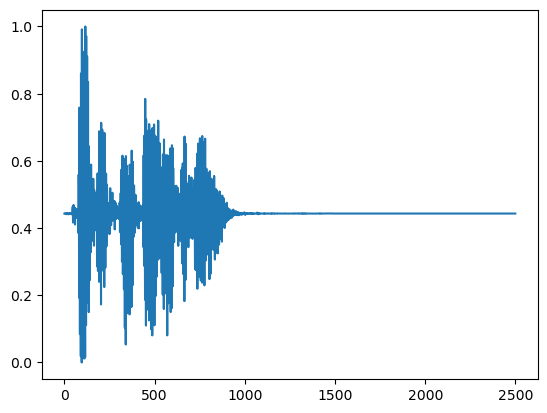

In [11]:
plt.plot(X_train[0])

plt.show()

In [7]:
target_train = pd.read_csv(r"C:\Users\franc\Desktop\Università\Data Science and Business Informatics\Esami\Primo anno\Primo semestre\Data Mining\Progetto 2\RavdessAudioOnlyNumpy__Y_train-Copy1.csv")

In [8]:
target_train

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav
...,...,...,...,...,...,...,...,...,...
1823,audio-only,speech,surprised,normal,Dogs are sitting by the door,2nd,18,F,03-01-08-01-02-02-18.wav
1824,audio-only,speech,surprised,strong,Kids are talking by the door,1st,18,F,03-01-08-02-01-01-18.wav
1825,audio-only,speech,surprised,strong,Kids are talking by the door,2nd,18,F,03-01-08-02-01-02-18.wav
1826,audio-only,speech,surprised,strong,Dogs are sitting by the door,1st,18,F,03-01-08-02-02-01-18.wav


In [9]:
target_test = pd.read_csv(r"C:\Users\franc\Desktop\Università\Data Science and Business Informatics\Esami\Primo anno\Primo semestre\Data Mining\Progetto 2\RavdessAudioOnlyNumpy__Y_test-Copy1.csv")

In [10]:
le = LabelEncoder()
target_train['emotion'] = le.fit_transform(target_train['emotion'])# se faccio metodo dummy avrei altre 8 colonne in più. cosi rimane una

In [11]:
le = LabelEncoder()
target_test['emotion'] = le.fit_transform(target_test['emotion'])# se faccio metodo dummy avrei altre 8 colonne in più. cosi rimane una

In [12]:
y_train = np.array(target_train["emotion"]) #target variable
len(y_train)

1828

In [13]:
y_test = np.array(target_test["emotion"]) #target variable
len(y_test)

624

In [14]:
y_train

array([5, 5, 5, ..., 7, 7, 7])

## KNN (euclidean)

In [15]:
from scipy.stats import uniform, randint, loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform, randint, loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.datatypes import convert
from sktime.datatypes._panel._convert import from_3d_numpy_to_nested
from sktime.datatypes._panel._convert import from_nested_to_long
from sktime.datatypes._panel._convert import from_nested_to_3d_numpy
from sklearn.metrics import classification_report

In [130]:
X_train.shape

(1828, 2500)

In [131]:
y_train.shape

(1828,)

In [132]:
%%time
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11],
    "metric": ["euclidean"]
}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5,random_state=0),
    n_jobs=-1,
    refit=True,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

Wall time: 9.86 s


In [133]:
print(grid.best_params_, grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 11} 0.2604395538588218


In [134]:
clf.score(X_test, y_test)

0.2516025641025641

## KNN (dtw)

In [135]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [136]:
clf = KNeighborsTimeSeriesClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier()

In [137]:
%%time
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.23      0.31        96
           1       0.44      0.58      0.50        96
           2       0.36      0.17      0.23        48
           3       0.35      0.28      0.31        96
           4       0.29      0.29      0.29        96
           5       0.35      0.67      0.46        48
           6       0.32      0.44      0.37        96
           7       0.28      0.19      0.23        48

    accuracy                           0.36       624
   macro avg       0.36      0.36      0.34       624
weighted avg       0.36      0.36      0.34       624

Wall time: 10h 4s


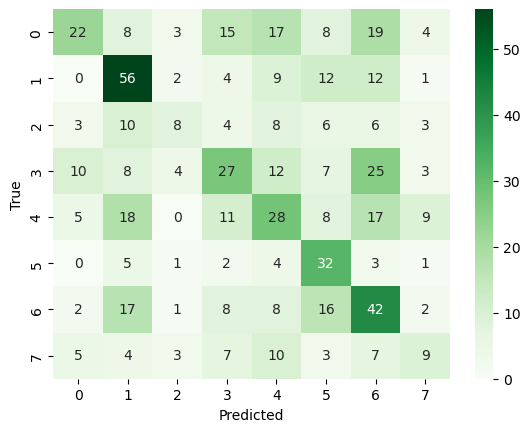

96
96
48
96
96
48
96
48


In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
a = [22, 8, 3, 15, 17, 8, 19, 4]
b = [0, 56, 2, 4, 9, 12, 12, 1]
c = [3, 10, 8, 4, 8, 6, 6, 3]
d = [10, 8, 4, 27, 12, 7, 25, 3]
e = [5, 18, 0, 11, 28, 8, 17, 9]
f = [0, 5, 1, 2, 4, 32, 3, 1]
g = [2, 17, 1, 8, 8, 16, 42, 2]
h = [5, 4, 3, 7, 10, 3, 7, 9]
cf = (a, b, c, d, e, f, g, h) 
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(sum(a))
print(sum(b))
print(sum(c))
print(sum(d))
print(sum(e))
print(sum(f))
print(sum(g))
print(sum(h))

In [ ]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

## Rocket

In [24]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket

In [26]:
%%time
rocket = Rocket()  # by default, MiniRocket uses ~10,000 kernels
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)
clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
clf.fit(X_train_transform, y_train)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Wall time: 4.37 s


RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifierCV

rocket = Rocket()  # by default, MiniRocket uses ~10,000 kernels
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifierCV(alphas=np.logspace(-3, 3, 10)))
model.fit(X_train_transform, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])))])

In [37]:
X_test_transform = rocket.transform(X_test)
y_pred = clf.predict(X_test_transform)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      1.00      0.27        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00        48

    accuracy                           0.15       624
   macro avg       0.02      0.12      0.03       624
weighted avg       0.02      0.15      0.04       624



C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [61]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [62]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  2500
N. LABELS:  8


In [63]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [64]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 2493, 16)          144       
                                                                 
 batch_normalization_9 (Batc  (None, 2493, 16)         64        
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 2493, 16)          0         
                                                                 
 dropout_5 (Dropout)         (None, 2493, 16)          0         
                                                                 
 conv1d_10 (Conv1D)          (None, 2489, 32)          2592      
                                                                 
 batch_normalization_10 (Bat  (None, 2489, 32)         128       
 chNormalization)                                     

In [65]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [66]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [67]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=15, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/15
92/92 [==============================] - 9s 89ms/step - loss: 2.0059 - accuracy: 0.1758 - val_loss: 2.0767 - val_accuracy: 0.1530 - lr: 0.0010
Epoch 2/15
92/92 [==============================] - 8s 90ms/step - loss: 1.9226 - accuracy: 0.2483 - val_loss: 2.0752 - val_accuracy: 0.1421 - lr: 0.0010
Epoch 3/15
92/92 [==============================] - 8s 89ms/step - loss: 1.8606 - accuracy: 0.2873 - val_loss: 2.0702 - val_accuracy: 0.1803 - lr: 0.0010
Epoch 4/15
92/92 [==============================] - 8s 91ms/step - loss: 1.8208 - accuracy: 0.3085 - val_loss: 2.0351 - val_accuracy: 0.1940 - lr: 0.0010
Epoch 5/15
92/92 [==============================] - 8s 89ms/step - loss: 1.7847 - accuracy: 0.3276 - val_loss: 2.0039 - val_accuracy: 0.2077 - lr: 0.0010
Epoch 6/15
92/92 [==============================] - 8s 90ms/step - loss: 1.7625 - accuracy: 0.3331 - val_loss: 2.2947 - val_accuracy: 0.1475 - lr: 0.0010
Epoch 7/15
92/92 [==============================] - 8s 87ms/step - loss: 1.7

In [68]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

20/20 [==============================] - 0s 16ms/step
Accuracy 0.22435897435897437
F1-score [0.25       0.34558824 0.         0.         0.02020202 0.37362637
 0.11827957 0.        ]
              precision    recall  f1-score   support

           0       0.42      0.18      0.25        96
           1       0.21      0.98      0.35        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.33      0.01      0.02        96
           5       0.40      0.35      0.37        48
           6       0.12      0.11      0.12        96
           7       0.00      0.00      0.00        48

    accuracy                           0.22       624
   macro avg       0.19      0.20      0.14       624
weighted avg       0.20      0.22      0.14       624



C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
cnn.evaluate(X_test_cnn, y_test)

20/20 [==============================] - 0s 16ms/step - loss: 2.8331 - accuracy: 0.2244


[2.833139657974243, 0.22435897588729858]

In [71]:
from collections import Counter
value_counts = Counter(y_train)

for value, count in value_counts.items():
    print(f"Value {value} occurs {count} times.")

Value 5 occurs 140 times.
Value 1 occurs 280 times.
Value 4 occurs 280 times.
Value 6 occurs 280 times.
Value 0 occurs 280 times.
Value 3 occurs 280 times.
Value 2 occurs 144 times.
Value 7 occurs 144 times.


In [73]:
value_counts = Counter(y_test)

for value, count in value_counts.items():
    print(f"Value {value} occurs {count} times.")

Value 5 occurs 48 times.
Value 1 occurs 96 times.
Value 4 occurs 96 times.
Value 6 occurs 96 times.
Value 0 occurs 96 times.
Value 3 occurs 96 times.
Value 2 occurs 48 times.
Value 7 occurs 48 times.


In [72]:
value_counts = Counter(y_pred)

for value, count in value_counts.items():
    print(f"Value {value} occurs {count} times.")

Value 1 occurs 448 times.
Value 0 occurs 40 times.
Value 6 occurs 90 times.
Value 4 occurs 3 times.
Value 5 occurs 43 times.


### CNN complesso con 75 epochs

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score 

In [48]:
def build_more_complex_cnn(n_timesteps, n_outputs):
    model = Sequential()

    model.add(Conv1D(filters=32, kernel_size=10, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(GlobalAveragePooling1D())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(n_outputs, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [49]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  2500
N. LABELS:  8


In [50]:
cnn = build_more_complex_cnn(n_timesteps, n_outputs)

In [51]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 2491, 32)          352       
                                                                 
 batch_normalization_15 (Bat  (None, 2491, 32)         128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 2491, 32)          0         
                                                                 
 dropout_14 (Dropout)        (None, 2491, 32)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 2484, 64)          16448     
                                                                 
 batch_normalization_16 (Bat  (None, 2484, 64)         256       
 chNormalization)                                     

In [52]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [53]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=75, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/75
92/92 [==============================] - 41s 432ms/step - loss: 2.0228 - accuracy: 0.1874 - val_loss: 2.0554 - val_accuracy: 0.2186 - lr: 0.0010
Epoch 2/75
92/92 [==============================] - 39s 426ms/step - loss: 1.8354 - accuracy: 0.2770 - val_loss: 1.9467 - val_accuracy: 0.2568 - lr: 0.0010
Epoch 3/75
92/92 [==============================] - 39s 428ms/step - loss: 1.7381 - accuracy: 0.3105 - val_loss: 1.8725 - val_accuracy: 0.2377 - lr: 0.0010
Epoch 4/75
92/92 [==============================] - 40s 430ms/step - loss: 1.6743 - accuracy: 0.3283 - val_loss: 1.7819 - val_accuracy: 0.2678 - lr: 0.0010
Epoch 5/75
92/92 [==============================] - 39s 426ms/step - loss: 1.6522 - accuracy: 0.3235 - val_loss: 1.6590 - val_accuracy: 0.3115 - lr: 0.0010
Epoch 6/75
92/92 [==============================] - 39s 424ms/step - loss: 1.5838 - accuracy: 0.3653 - val_loss: 1.5828 - val_accuracy: 0.3552 - lr: 0.0010
Epoch 7/75
92/92 [==============================] - 39s 426ms/st

In [125]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

20/20 [==============================] - 2s 113ms/step
Accuracy 0.4326923076923077
F1-score [0.31952663 0.63755459 0.25806452 0.32352941 0.34722222 0.56666667
 0.48780488 0.34782609]
              precision    recall  f1-score   support

           0       0.37      0.28      0.32        96
           1       0.55      0.76      0.64        96
           2       0.57      0.17      0.26        48
           3       0.31      0.34      0.32        96
           4       0.52      0.26      0.35        96
           5       0.47      0.71      0.57        48
           6       0.46      0.52      0.49        96
           7       0.30      0.42      0.35        48

    accuracy                           0.43       624
   macro avg       0.44      0.43      0.41       624
weighted avg       0.44      0.43      0.42       624



In [ ]:
cnn.evaluate(X_test_cnn, y_test)

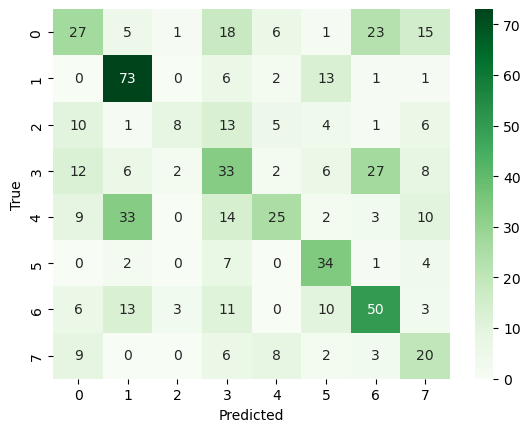

In [126]:
cf = confusion_matrix(y_true=y_test,y_pred=y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [128]:
val_loss, val_accuracy = cnn.evaluate(X_val_cnn, y_val_cnn)

print('Validation Accuracy: %.2f' % (val_accuracy * 100))

12/12 [==============================] - 2s 113ms/step - loss: 2.2000 - accuracy: 0.4399
Validation Accuracy: 43.99


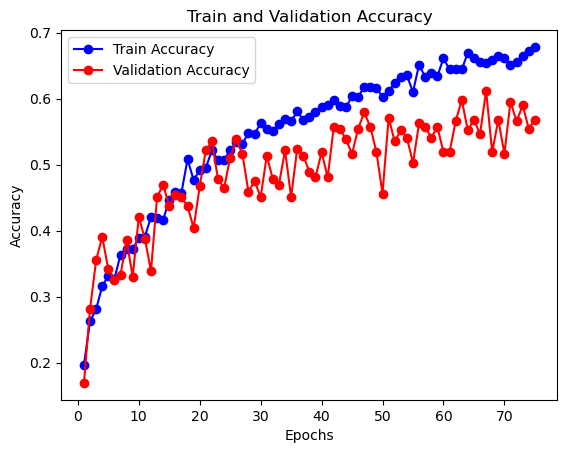

In [94]:
train_accuracy = history_cnn['accuracy']
val_accuracy = history_cnn['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot train and validation accuracy
plt.plot(epochs, train_accuracy, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
from keras.models import load_model
best_model = load_model('best_model_cnn.h5')

In [55]:
y_pred = np.argmax(best_model.predict(X_test_cnn), axis=1)

20/20 [==============================] - 2s 96ms/step


In [56]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5689102564102564
F1-score [0.52849741 0.80751174 0.47058824 0.47804878 0.5        0.625
 0.53475936 0.52991453]
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        96
           1       0.74      0.90      0.81        96
           2       0.54      0.42      0.47        48
           3       0.45      0.51      0.48        96
           4       0.68      0.40      0.50        96
           5       0.62      0.62      0.62        48
           6       0.55      0.52      0.53        96
           7       0.45      0.65      0.53        48

    accuracy                           0.57       624
   macro avg       0.57      0.57      0.56       624
weighted avg       0.58      0.57      0.56       624



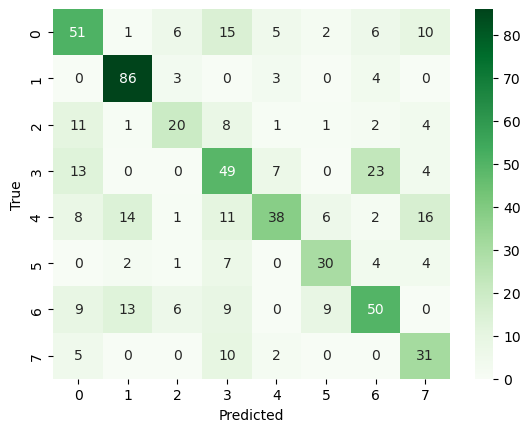

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_true=y_test,y_pred=y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [61]:
val_loss, val_accuracy = best_model.evaluate(X_val_cnn, y_val_cnn)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

12/12 [==============================] - 1s 101ms/step - loss: 1.1635 - accuracy: 0.5710
Validation Loss: 1.1635072231292725
Validation Accuracy: 0.5710382461547852


In [ ]:
best_model.

### CNN complessa con 150 epochs

In [62]:
cnn = build_more_complex_cnn(n_timesteps, n_outputs)

In [63]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 2491, 32)          352       
                                                                 
 batch_normalization_19 (Bat  (None, 2491, 32)         128       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 2491, 32)          0         
                                                                 
 dropout_20 (Dropout)        (None, 2491, 32)          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 2484, 64)          16448     
                                                                 
 batch_normalization_20 (Bat  (None, 2484, 64)         256       
 chNormalization)                                     

In [64]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [65]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=150, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/150
92/92 [==============================] - 46s 478ms/step - loss: 2.0497 - accuracy: 0.1799 - val_loss: 2.0643 - val_accuracy: 0.1612 - lr: 0.0010
Epoch 2/150
92/92 [==============================] - 47s 507ms/step - loss: 1.8560 - accuracy: 0.2572 - val_loss: 2.0123 - val_accuracy: 0.2295 - lr: 0.0010
Epoch 3/150
92/92 [==============================] - 46s 499ms/step - loss: 1.7524 - accuracy: 0.2975 - val_loss: 1.8170 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/150
92/92 [==============================] - 46s 504ms/step - loss: 1.6860 - accuracy: 0.3174 - val_loss: 1.6958 - val_accuracy: 0.3443 - lr: 0.0010
Epoch 5/150
92/92 [==============================] - 47s 512ms/step - loss: 1.6237 - accuracy: 0.3399 - val_loss: 1.7275 - val_accuracy: 0.3115 - lr: 0.0010
Epoch 6/150
92/92 [==============================] - 46s 499ms/step - loss: 1.5946 - accuracy: 0.3495 - val_loss: 1.6405 - val_accuracy: 0.3306 - lr: 0.0010
Epoch 7/150
92/92 [==============================] - 47s 5

Epoch 53/150
92/92 [==============================] - 44s 481ms/step - loss: 0.9468 - accuracy: 0.6293 - val_loss: 1.1476 - val_accuracy: 0.5710 - lr: 0.0010
Epoch 54/150
92/92 [==============================] - 44s 482ms/step - loss: 0.9615 - accuracy: 0.6430 - val_loss: 1.5223 - val_accuracy: 0.4645 - lr: 0.0010
Epoch 55/150
92/92 [==============================] - 44s 480ms/step - loss: 0.9174 - accuracy: 0.6560 - val_loss: 1.3110 - val_accuracy: 0.5082 - lr: 0.0010
Epoch 56/150
92/92 [==============================] - 45s 491ms/step - loss: 0.9241 - accuracy: 0.6505 - val_loss: 1.5592 - val_accuracy: 0.4918 - lr: 0.0010
Epoch 57/150
92/92 [==============================] - 43s 465ms/step - loss: 0.9211 - accuracy: 0.6539 - val_loss: 1.3509 - val_accuracy: 0.5191 - lr: 0.0010
Epoch 58/150
92/92 [==============================] - 44s 474ms/step - loss: 0.9060 - accuracy: 0.6573 - val_loss: 1.5265 - val_accuracy: 0.4973 - lr: 0.0010
Epoch 59/150
92/92 [==============================] 

Epoch 105/150
92/92 [==============================] - 44s 483ms/step - loss: 0.6420 - accuracy: 0.7592 - val_loss: 1.3972 - val_accuracy: 0.5710 - lr: 0.0010
Epoch 106/150
92/92 [==============================] - 45s 486ms/step - loss: 0.6241 - accuracy: 0.7599 - val_loss: 1.5809 - val_accuracy: 0.5847 - lr: 0.0010
Epoch 107/150
92/92 [==============================] - 44s 481ms/step - loss: 0.6426 - accuracy: 0.7517 - val_loss: 1.7188 - val_accuracy: 0.5765 - lr: 0.0010
Epoch 108/150
92/92 [==============================] - 44s 484ms/step - loss: 0.6216 - accuracy: 0.7695 - val_loss: 1.5844 - val_accuracy: 0.5847 - lr: 0.0010
Epoch 109/150
92/92 [==============================] - 44s 478ms/step - loss: 0.5946 - accuracy: 0.7798 - val_loss: 1.5867 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 110/150
92/92 [==============================] - 45s 487ms/step - loss: 0.6385 - accuracy: 0.7661 - val_loss: 2.0154 - val_accuracy: 0.5219 - lr: 0.0010
Epoch 111/150
92/92 [=========================

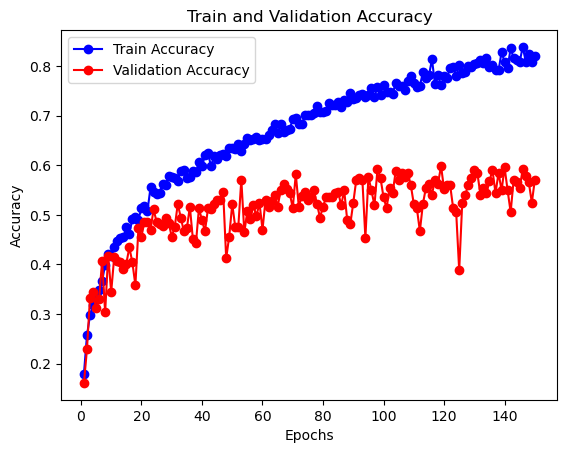

In [66]:
train_accuracy = history_cnn['accuracy']
val_accuracy = history_cnn['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot train and validation accuracy
plt.plot(epochs, train_accuracy, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
from keras.models import load_model
best_model = load_model('best_model_cnn.h5')

In [68]:
y_pred = np.argmax(best_model.predict(X_test_cnn), axis=1)

20/20 [==============================] - 3s 121ms/step


In [69]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5641025641025641
F1-score [0.54545455 0.73096447 0.47368421 0.47619048 0.58227848 0.63917526
 0.51546392 0.53571429]
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        96
           1       0.71      0.75      0.73        96
           2       0.41      0.56      0.47        48
           3       0.48      0.47      0.48        96
           4       0.74      0.48      0.58        96
           5       0.63      0.65      0.64        48
           6       0.51      0.52      0.52        96
           7       0.47      0.62      0.54        48

    accuracy                           0.56       624
   macro avg       0.56      0.57      0.56       624
weighted avg       0.58      0.56      0.57       624



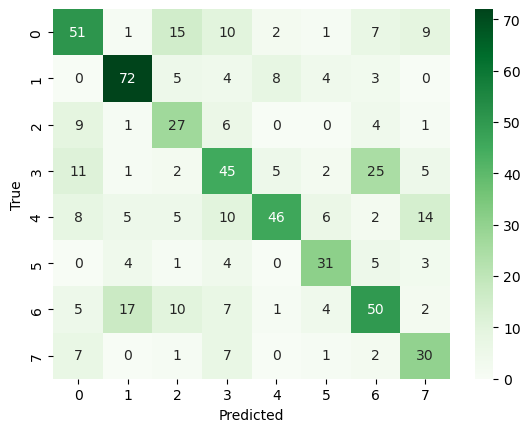

In [70]:
cf = confusion_matrix(y_true=y_test,y_pred=y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
#prova ad abbassare patience

## Shapelet

### 8 da 50

In [38]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
import tensorflow as tf

from tslearn.datasets import CachedDatasets

from tslearn.shapelets import LearningShapelets
from tslearn.utils import ts_size

In [79]:
X_train = df_paa1.values
X_test = df_paa2.values

In [80]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance()
X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test = scaler.transform(X_test).reshape(X_test.shape[0], X_test.shape[1])

In [154]:
n_ts, ts_sz = X_train.shape[:2]
n_classes = len(set(y_train))

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.02,
                                                       r=1)
shapelet_sizes[50] += 1
print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 1828
ts_sz 2500
n_classes 8
shapelet_sizes {50: 8}


In [155]:
import tensorflow.keras.optimizers as tf_optimizers
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=256,
                            weight_regularizer=.001,
                            max_iter=1000,
                            random_state=42,
                            verbose=1)


C:\Users\franc\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [156]:
shp_clf.fit(X_train, y_train)

Epoch 1/1000
8/8 [==============================] - 2s 156ms/step - loss: 2.1328 - categorical_accuracy: 0.1756 - categorical_crossentropy: 2.1250
Epoch 2/1000
8/8 [==============================] - 1s 158ms/step - loss: 2.0639 - categorical_accuracy: 0.1368 - categorical_crossentropy: 2.0568
Epoch 3/1000
8/8 [==============================] - 1s 155ms/step - loss: 2.0470 - categorical_accuracy: 0.1488 - categorical_crossentropy: 2.0402
Epoch 4/1000
8/8 [==============================] - 1s 161ms/step - loss: 2.0409 - categorical_accuracy: 0.1729 - categorical_crossentropy: 2.0343
Epoch 5/1000
8/8 [==============================] - 1s 165ms/step - loss: 2.0356 - categorical_accuracy: 0.1805 - categorical_crossentropy: 2.0292
Epoch 6/1000
8/8 [==============================] - 1s 159ms/step - loss: 2.0315 - categorical_accuracy: 0.1986 - categorical_crossentropy: 2.0252
Epoch 7/1000
8/8 [==============================] - 1s 161ms/step - loss: 2.0285 - categorical_accuracy: 0.2002 - cate

8/8 [==============================] - 1s 154ms/step - loss: 1.7061 - categorical_accuracy: 0.3550 - categorical_crossentropy: 1.6791
Epoch 112/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.7036 - categorical_accuracy: 0.3435 - categorical_crossentropy: 1.6764
Epoch 113/1000
8/8 [==============================] - 1s 152ms/step - loss: 1.7068 - categorical_accuracy: 0.3501 - categorical_crossentropy: 1.6794
Epoch 114/1000
8/8 [==============================] - 1s 154ms/step - loss: 1.7054 - categorical_accuracy: 0.3512 - categorical_crossentropy: 1.6780
Epoch 115/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.7080 - categorical_accuracy: 0.3556 - categorical_crossentropy: 1.6804
Epoch 116/1000
8/8 [==============================] - 1s 156ms/step - loss: 1.7018 - categorical_accuracy: 0.3490 - categorical_crossentropy: 1.6741
Epoch 117/1000
8/8 [==============================] - 1s 160ms/step - loss: 1.7045 - categorical_accuracy: 0.3578 - categ

8/8 [==============================] - 1s 152ms/step - loss: 1.6671 - categorical_accuracy: 0.3704 - categorical_crossentropy: 1.6341
Epoch 167/1000
8/8 [==============================] - 1s 151ms/step - loss: 1.6670 - categorical_accuracy: 0.3698 - categorical_crossentropy: 1.6340
Epoch 168/1000
8/8 [==============================] - 1s 156ms/step - loss: 1.6620 - categorical_accuracy: 0.3747 - categorical_crossentropy: 1.6288
Epoch 169/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.6748 - categorical_accuracy: 0.3714 - categorical_crossentropy: 1.6416
Epoch 170/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.6665 - categorical_accuracy: 0.3682 - categorical_crossentropy: 1.6331
Epoch 171/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.6627 - categorical_accuracy: 0.3829 - categorical_crossentropy: 1.6293
Epoch 172/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.6553 - categorical_accuracy: 0.3742 - categ

8/8 [==============================] - 1s 165ms/step - loss: 1.6355 - categorical_accuracy: 0.3742 - categorical_crossentropy: 1.5985
Epoch 222/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.6387 - categorical_accuracy: 0.3753 - categorical_crossentropy: 1.6016
Epoch 223/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.6390 - categorical_accuracy: 0.3687 - categorical_crossentropy: 1.6020
Epoch 224/1000
8/8 [==============================] - 1s 155ms/step - loss: 1.6241 - categorical_accuracy: 0.3922 - categorical_crossentropy: 1.5869
Epoch 225/1000
8/8 [==============================] - 1s 162ms/step - loss: 1.6231 - categorical_accuracy: 0.3840 - categorical_crossentropy: 1.5860
Epoch 226/1000
8/8 [==============================] - 1s 161ms/step - loss: 1.6363 - categorical_accuracy: 0.3687 - categorical_crossentropy: 1.5991
Epoch 227/1000
8/8 [==============================] - 1s 161ms/step - loss: 1.6323 - categorical_accuracy: 0.3922 - categ

8/8 [==============================] - 1s 161ms/step - loss: 1.5979 - categorical_accuracy: 0.3977 - categorical_crossentropy: 1.5579
Epoch 277/1000
8/8 [==============================] - 1s 164ms/step - loss: 1.5935 - categorical_accuracy: 0.3950 - categorical_crossentropy: 1.5534
Epoch 278/1000
8/8 [==============================] - 1s 162ms/step - loss: 1.5938 - categorical_accuracy: 0.3939 - categorical_crossentropy: 1.5538
Epoch 279/1000
8/8 [==============================] - 2s 186ms/step - loss: 1.5998 - categorical_accuracy: 0.4059 - categorical_crossentropy: 1.5597
Epoch 280/1000
8/8 [==============================] - 2s 187ms/step - loss: 1.5997 - categorical_accuracy: 0.3879 - categorical_crossentropy: 1.5595
Epoch 281/1000
8/8 [==============================] - 2s 200ms/step - loss: 1.5934 - categorical_accuracy: 0.3977 - categorical_crossentropy: 1.5532
Epoch 282/1000
8/8 [==============================] - 1s 175ms/step - loss: 1.5938 - categorical_accuracy: 0.4015 - categ

8/8 [==============================] - 1s 174ms/step - loss: 1.5818 - categorical_accuracy: 0.4015 - categorical_crossentropy: 1.5389
Epoch 332/1000
8/8 [==============================] - 1s 164ms/step - loss: 1.5752 - categorical_accuracy: 0.3933 - categorical_crossentropy: 1.5324
Epoch 333/1000
8/8 [==============================] - 1s 163ms/step - loss: 1.5677 - categorical_accuracy: 0.4158 - categorical_crossentropy: 1.5248
Epoch 334/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.5701 - categorical_accuracy: 0.4086 - categorical_crossentropy: 1.5272
Epoch 335/1000
8/8 [==============================] - 1s 158ms/step - loss: 1.5749 - categorical_accuracy: 0.4059 - categorical_crossentropy: 1.5319
Epoch 336/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.5749 - categorical_accuracy: 0.4075 - categorical_crossentropy: 1.5320
Epoch 337/1000
8/8 [==============================] - 1s 158ms/step - loss: 1.5685 - categorical_accuracy: 0.4190 - categ

8/8 [==============================] - 1s 159ms/step - loss: 1.5633 - categorical_accuracy: 0.4054 - categorical_crossentropy: 1.5189
Epoch 387/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.5606 - categorical_accuracy: 0.4190 - categorical_crossentropy: 1.5162
Epoch 388/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.5633 - categorical_accuracy: 0.4010 - categorical_crossentropy: 1.5189
Epoch 389/1000
8/8 [==============================] - 1s 161ms/step - loss: 1.5591 - categorical_accuracy: 0.4190 - categorical_crossentropy: 1.5147
Epoch 390/1000
8/8 [==============================] - 1s 165ms/step - loss: 1.5605 - categorical_accuracy: 0.4059 - categorical_crossentropy: 1.5160
Epoch 391/1000
8/8 [==============================] - 1s 166ms/step - loss: 1.5495 - categorical_accuracy: 0.4147 - categorical_crossentropy: 1.5050
Epoch 392/1000
8/8 [==============================] - 1s 163ms/step - loss: 1.5560 - categorical_accuracy: 0.4201 - categ

8/8 [==============================] - 1s 166ms/step - loss: 1.5398 - categorical_accuracy: 0.4349 - categorical_crossentropy: 1.4939
Epoch 442/1000
8/8 [==============================] - 1s 164ms/step - loss: 1.5392 - categorical_accuracy: 0.4168 - categorical_crossentropy: 1.4934
Epoch 443/1000
8/8 [==============================] - 1s 162ms/step - loss: 1.5433 - categorical_accuracy: 0.4185 - categorical_crossentropy: 1.4974
Epoch 444/1000
8/8 [==============================] - 1s 161ms/step - loss: 1.5390 - categorical_accuracy: 0.4196 - categorical_crossentropy: 1.4931
Epoch 445/1000
8/8 [==============================] - 1s 161ms/step - loss: 1.5439 - categorical_accuracy: 0.4141 - categorical_crossentropy: 1.4980
Epoch 446/1000
8/8 [==============================] - 1s 164ms/step - loss: 1.5423 - categorical_accuracy: 0.4223 - categorical_crossentropy: 1.4963
Epoch 447/1000
8/8 [==============================] - 1s 163ms/step - loss: 1.5431 - categorical_accuracy: 0.4272 - categ

8/8 [==============================] - 1s 157ms/step - loss: 1.5419 - categorical_accuracy: 0.4158 - categorical_crossentropy: 1.4950
Epoch 497/1000
8/8 [==============================] - 1s 167ms/step - loss: 1.5498 - categorical_accuracy: 0.4223 - categorical_crossentropy: 1.5028
Epoch 498/1000
8/8 [==============================] - 1s 166ms/step - loss: 1.5357 - categorical_accuracy: 0.4223 - categorical_crossentropy: 1.4887
Epoch 499/1000
8/8 [==============================] - 1s 165ms/step - loss: 1.5386 - categorical_accuracy: 0.4382 - categorical_crossentropy: 1.4915
Epoch 500/1000
8/8 [==============================] - 1s 160ms/step - loss: 1.5404 - categorical_accuracy: 0.4141 - categorical_crossentropy: 1.4933
Epoch 501/1000
8/8 [==============================] - 1s 156ms/step - loss: 1.5384 - categorical_accuracy: 0.4289 - categorical_crossentropy: 1.4912
Epoch 502/1000
8/8 [==============================] - 1s 160ms/step - loss: 1.5438 - categorical_accuracy: 0.4147 - categ

8/8 [==============================] - 1s 153ms/step - loss: 1.5279 - categorical_accuracy: 0.4174 - categorical_crossentropy: 1.4796
Epoch 552/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.5303 - categorical_accuracy: 0.4360 - categorical_crossentropy: 1.4820
Epoch 553/1000
8/8 [==============================] - 1s 152ms/step - loss: 1.5271 - categorical_accuracy: 0.4207 - categorical_crossentropy: 1.4788
Epoch 554/1000
8/8 [==============================] - 1s 152ms/step - loss: 1.5326 - categorical_accuracy: 0.4267 - categorical_crossentropy: 1.4843
Epoch 555/1000
8/8 [==============================] - 1s 156ms/step - loss: 1.5202 - categorical_accuracy: 0.4365 - categorical_crossentropy: 1.4719
Epoch 556/1000
8/8 [==============================] - 1s 155ms/step - loss: 1.5219 - categorical_accuracy: 0.4229 - categorical_crossentropy: 1.4737
Epoch 557/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.5382 - categorical_accuracy: 0.4201 - categ

8/8 [==============================] - 1s 152ms/step - loss: 1.5204 - categorical_accuracy: 0.4327 - categorical_crossentropy: 1.4711
Epoch 607/1000
8/8 [==============================] - 1s 154ms/step - loss: 1.5323 - categorical_accuracy: 0.4174 - categorical_crossentropy: 1.4830
Epoch 608/1000
8/8 [==============================] - 1s 152ms/step - loss: 1.5357 - categorical_accuracy: 0.4305 - categorical_crossentropy: 1.4863
Epoch 609/1000
8/8 [==============================] - 1s 155ms/step - loss: 1.5366 - categorical_accuracy: 0.4305 - categorical_crossentropy: 1.4872
Epoch 610/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.5375 - categorical_accuracy: 0.4196 - categorical_crossentropy: 1.4881
Epoch 611/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.5419 - categorical_accuracy: 0.4256 - categorical_crossentropy: 1.4925
Epoch 612/1000
8/8 [==============================] - 1s 160ms/step - loss: 1.5213 - categorical_accuracy: 0.4398 - categ

8/8 [==============================] - 1s 162ms/step - loss: 1.5163 - categorical_accuracy: 0.4420 - categorical_crossentropy: 1.4659
Epoch 662/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.5148 - categorical_accuracy: 0.4267 - categorical_crossentropy: 1.4644
Epoch 663/1000
8/8 [==============================] - 1s 154ms/step - loss: 1.5159 - categorical_accuracy: 0.4447 - categorical_crossentropy: 1.4655
Epoch 664/1000
8/8 [==============================] - 1s 152ms/step - loss: 1.5144 - categorical_accuracy: 0.4420 - categorical_crossentropy: 1.4639
Epoch 665/1000
8/8 [==============================] - 1s 152ms/step - loss: 1.5210 - categorical_accuracy: 0.4261 - categorical_crossentropy: 1.4705
Epoch 666/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.5109 - categorical_accuracy: 0.4409 - categorical_crossentropy: 1.4604
Epoch 667/1000
8/8 [==============================] - 1s 155ms/step - loss: 1.5234 - categorical_accuracy: 0.4316 - categ

8/8 [==============================] - 1s 155ms/step - loss: 1.5085 - categorical_accuracy: 0.4437 - categorical_crossentropy: 1.4577
Epoch 717/1000
8/8 [==============================] - 1s 160ms/step - loss: 1.5073 - categorical_accuracy: 0.4398 - categorical_crossentropy: 1.4565
Epoch 718/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.5162 - categorical_accuracy: 0.4562 - categorical_crossentropy: 1.4654
Epoch 719/1000
8/8 [==============================] - 1s 153ms/step - loss: 1.5247 - categorical_accuracy: 0.4234 - categorical_crossentropy: 1.4739
Epoch 720/1000
8/8 [==============================] - 1s 152ms/step - loss: 1.5329 - categorical_accuracy: 0.4404 - categorical_crossentropy: 1.4820
Epoch 721/1000
8/8 [==============================] - 1s 150ms/step - loss: 1.5185 - categorical_accuracy: 0.4267 - categorical_crossentropy: 1.4677
Epoch 722/1000
8/8 [==============================] - 1s 156ms/step - loss: 1.5111 - categorical_accuracy: 0.4486 - categ

8/8 [==============================] - 1s 164ms/step - loss: 1.5177 - categorical_accuracy: 0.4442 - categorical_crossentropy: 1.4664
Epoch 772/1000
8/8 [==============================] - 1s 160ms/step - loss: 1.5133 - categorical_accuracy: 0.4245 - categorical_crossentropy: 1.4620
Epoch 773/1000
8/8 [==============================] - 1s 162ms/step - loss: 1.5117 - categorical_accuracy: 0.4535 - categorical_crossentropy: 1.4604
Epoch 774/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.5010 - categorical_accuracy: 0.4426 - categorical_crossentropy: 1.4497
Epoch 775/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.5069 - categorical_accuracy: 0.4464 - categorical_crossentropy: 1.4556
Epoch 776/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.5029 - categorical_accuracy: 0.4404 - categorical_crossentropy: 1.4516
Epoch 777/1000
8/8 [==============================] - 1s 158ms/step - loss: 1.5053 - categorical_accuracy: 0.4453 - categ

8/8 [==============================] - 1s 159ms/step - loss: 1.5044 - categorical_accuracy: 0.4387 - categorical_crossentropy: 1.4529
Epoch 827/1000
8/8 [==============================] - 1s 170ms/step - loss: 1.5046 - categorical_accuracy: 0.4519 - categorical_crossentropy: 1.4531
Epoch 828/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.5150 - categorical_accuracy: 0.4251 - categorical_crossentropy: 1.4634
Epoch 829/1000
8/8 [==============================] - 1s 172ms/step - loss: 1.5215 - categorical_accuracy: 0.4305 - categorical_crossentropy: 1.4700
Epoch 830/1000
8/8 [==============================] - 1s 156ms/step - loss: 1.5094 - categorical_accuracy: 0.4333 - categorical_crossentropy: 1.4578
Epoch 831/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.5084 - categorical_accuracy: 0.4562 - categorical_crossentropy: 1.4568
Epoch 832/1000
8/8 [==============================] - 1s 163ms/step - loss: 1.5041 - categorical_accuracy: 0.4415 - categ

8/8 [==============================] - 1s 163ms/step - loss: 1.5107 - categorical_accuracy: 0.4251 - categorical_crossentropy: 1.4588
Epoch 882/1000
8/8 [==============================] - 1s 176ms/step - loss: 1.5070 - categorical_accuracy: 0.4601 - categorical_crossentropy: 1.4551
Epoch 883/1000
8/8 [==============================] - 1s 174ms/step - loss: 1.5081 - categorical_accuracy: 0.4261 - categorical_crossentropy: 1.4563
Epoch 884/1000
8/8 [==============================] - 1s 166ms/step - loss: 1.5062 - categorical_accuracy: 0.4398 - categorical_crossentropy: 1.4544
Epoch 885/1000
8/8 [==============================] - 1s 158ms/step - loss: 1.4955 - categorical_accuracy: 0.4327 - categorical_crossentropy: 1.4436
Epoch 886/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.5004 - categorical_accuracy: 0.4497 - categorical_crossentropy: 1.4485
Epoch 887/1000
8/8 [==============================] - 1s 160ms/step - loss: 1.5013 - categorical_accuracy: 0.4486 - categ

8/8 [==============================] - 1s 156ms/step - loss: 1.4986 - categorical_accuracy: 0.4360 - categorical_crossentropy: 1.4466
Epoch 937/1000
8/8 [==============================] - 1s 156ms/step - loss: 1.4947 - categorical_accuracy: 0.4568 - categorical_crossentropy: 1.4426
Epoch 938/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.4958 - categorical_accuracy: 0.4530 - categorical_crossentropy: 1.4437
Epoch 939/1000
8/8 [==============================] - 1s 168ms/step - loss: 1.4957 - categorical_accuracy: 0.4546 - categorical_crossentropy: 1.4436
Epoch 940/1000
8/8 [==============================] - 1s 163ms/step - loss: 1.4976 - categorical_accuracy: 0.4453 - categorical_crossentropy: 1.4455
Epoch 941/1000
8/8 [==============================] - 1s 166ms/step - loss: 1.4944 - categorical_accuracy: 0.4579 - categorical_crossentropy: 1.4423
Epoch 942/1000
8/8 [==============================] - 1s 166ms/step - loss: 1.5127 - categorical_accuracy: 0.4294 - categ

8/8 [==============================] - 1s 163ms/step - loss: 1.4957 - categorical_accuracy: 0.4513 - categorical_crossentropy: 1.4432
Epoch 992/1000
8/8 [==============================] - 1s 167ms/step - loss: 1.4919 - categorical_accuracy: 0.4486 - categorical_crossentropy: 1.4393
Epoch 993/1000
8/8 [==============================] - 1s 161ms/step - loss: 1.4928 - categorical_accuracy: 0.4535 - categorical_crossentropy: 1.4402
Epoch 994/1000
8/8 [==============================] - 1s 161ms/step - loss: 1.4936 - categorical_accuracy: 0.4442 - categorical_crossentropy: 1.4410
Epoch 995/1000
8/8 [==============================] - 1s 157ms/step - loss: 1.5055 - categorical_accuracy: 0.4447 - categorical_crossentropy: 1.4530
Epoch 996/1000
8/8 [==============================] - 1s 159ms/step - loss: 1.5008 - categorical_accuracy: 0.4398 - categorical_crossentropy: 1.4482
Epoch 997/1000
8/8 [==============================] - 1s 156ms/step - loss: 1.4980 - categorical_accuracy: 0.4453 - categ

LearningShapelets(max_iter=1000, n_shapelets_per_size={50: 8},
                  optimizer=<keras.optimizers.adam.Adam object at 0x0000019601DAB0D0>,
                  random_state=42, verbose=1, weight_regularizer=0.001)

In [157]:
y_pred = shp_clf.predict(X_test)

3/3 [==============================] - 0s 73ms/step


In [158]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.33653846153846156
F1-score [0.28235294 0.48091603 0.17391304 0.25       0.30681818 0.42105263
 0.3231441  0.29473684]
              precision    recall  f1-score   support

           0       0.32      0.25      0.28        96
           1       0.38      0.66      0.48        96
           2       0.29      0.12      0.17        48
           3       0.34      0.20      0.25        96
           4       0.34      0.28      0.31        96
           5       0.43      0.42      0.42        48
           6       0.28      0.39      0.32        96
           7       0.30      0.29      0.29        48

    accuracy                           0.34       624
   macro avg       0.33      0.33      0.32       624
weighted avg       0.33      0.34      0.32       624



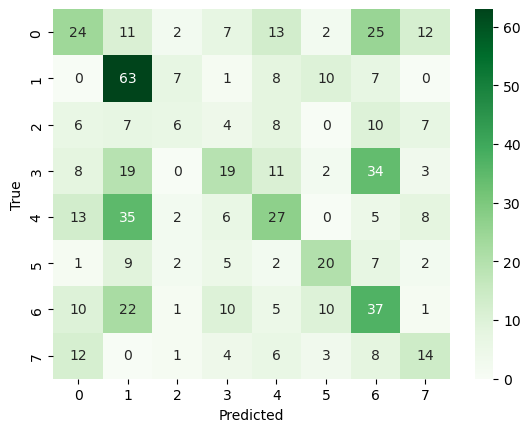

In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_true=y_test,y_pred=y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

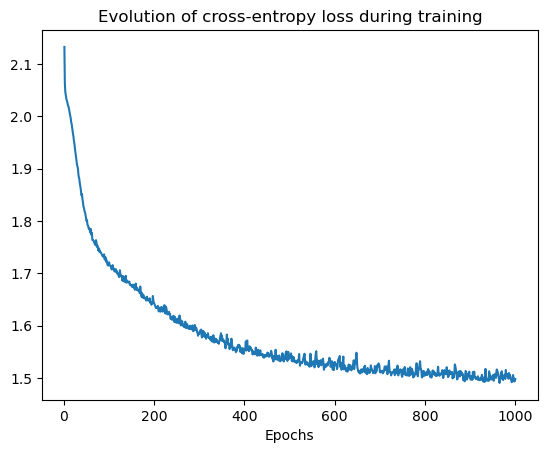

In [160]:
plt.figure()
plt.plot(np.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()

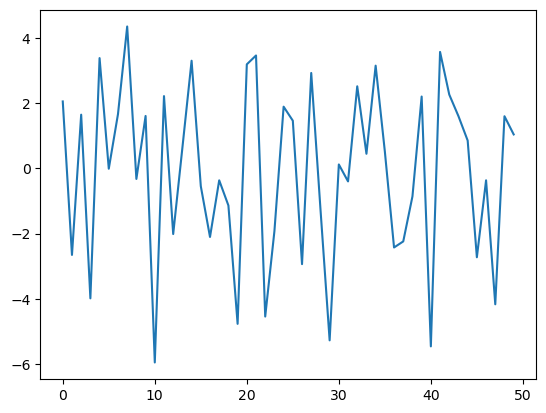

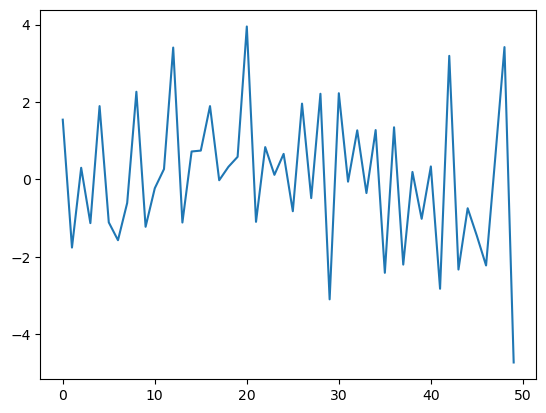

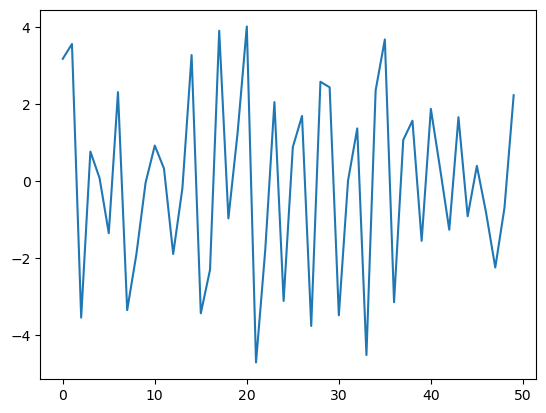

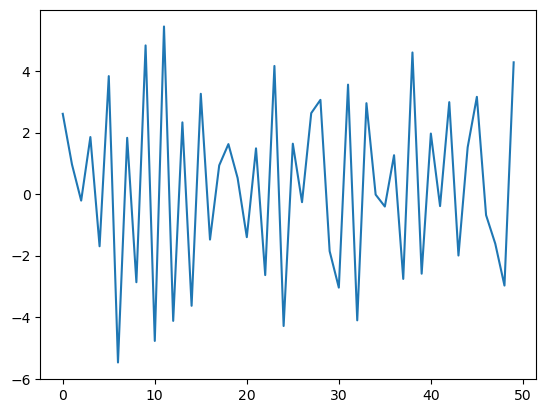

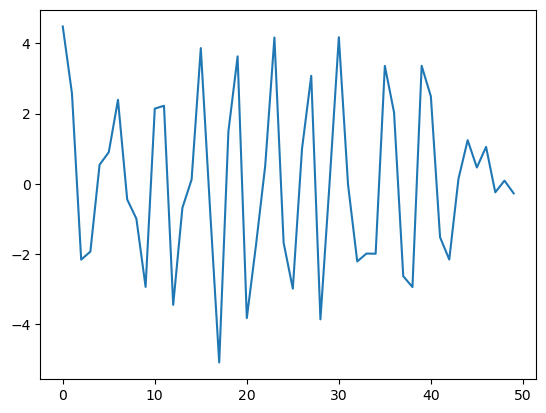

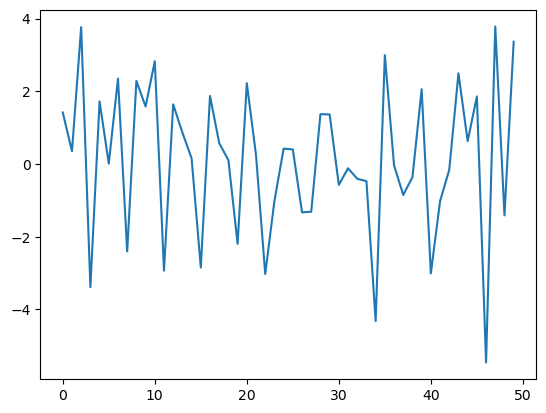

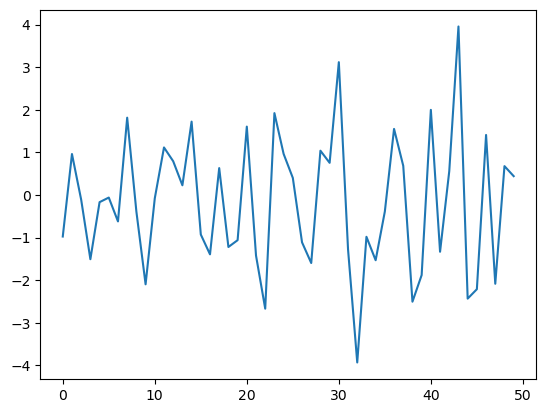

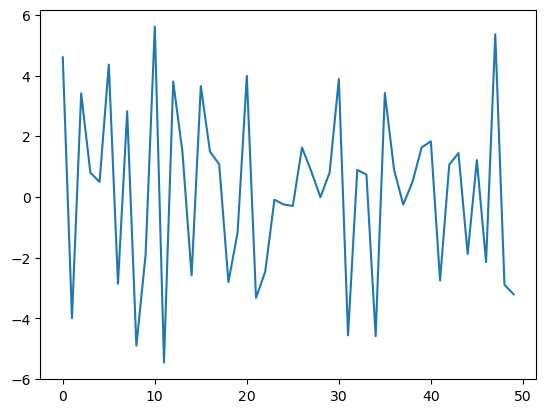

In [161]:

for i in range(8):
    plt.plot(shp_clf.shapelets_[i])
    plt.show()


In [150]:
from matplotlib import cm
from tslearn.datasets import CachedDatasets
import numpy

8/8 [==============================] - 1s 86ms/step


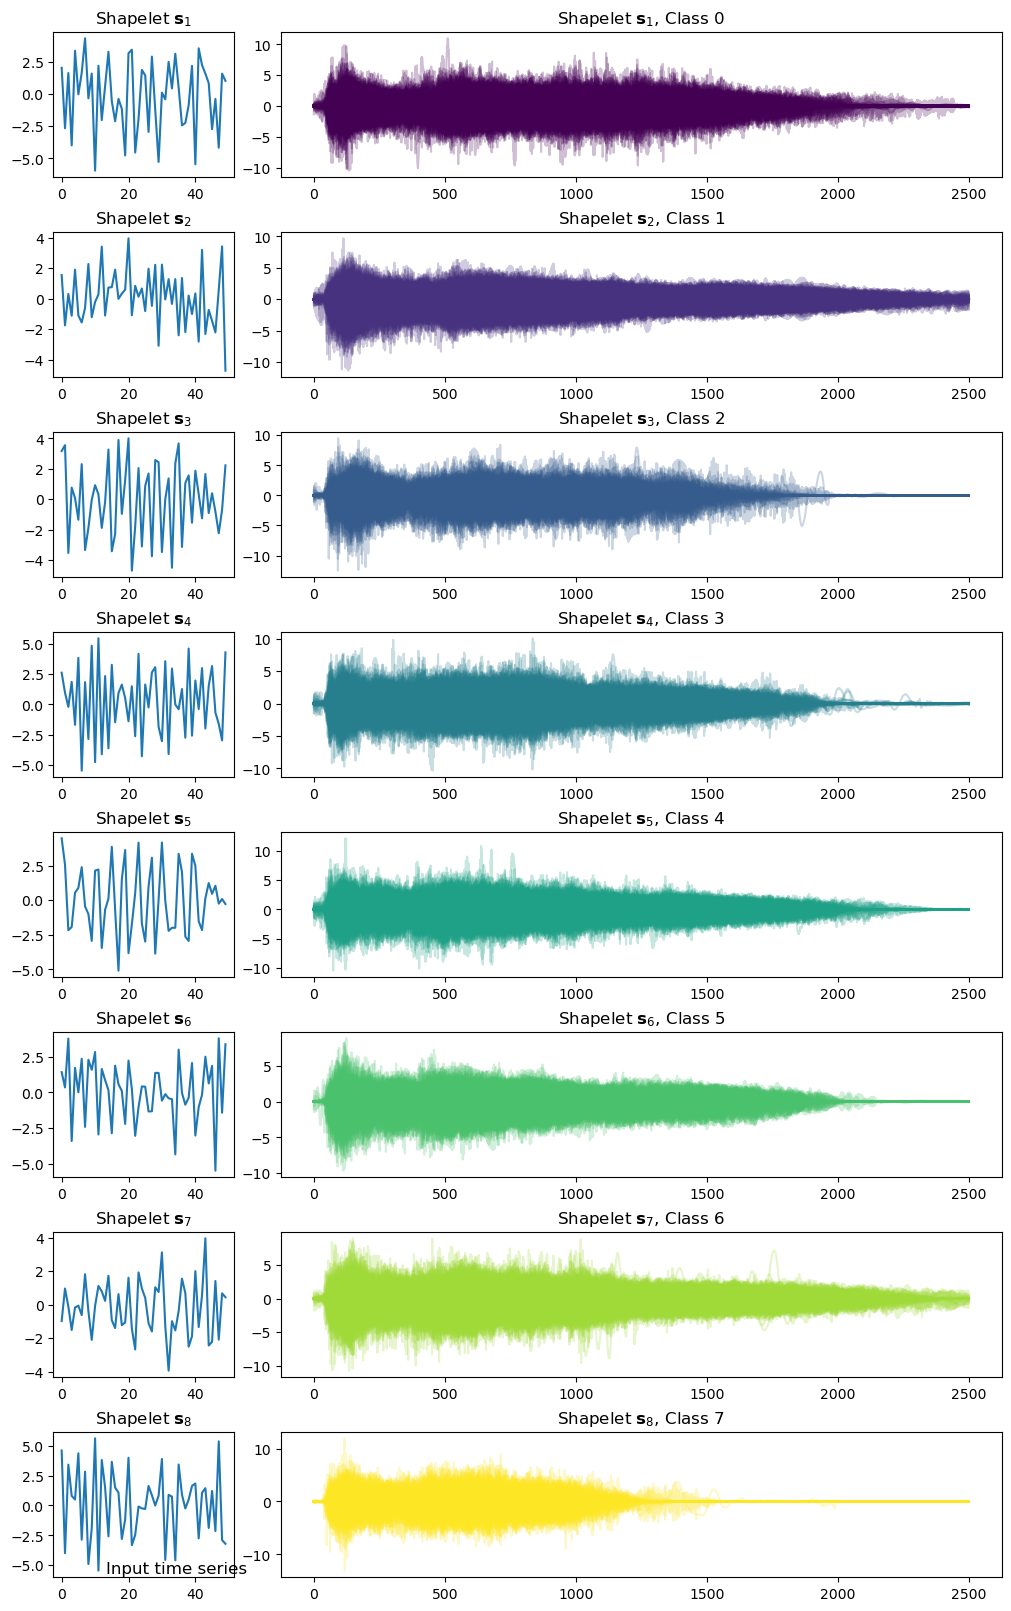

In [165]:
distances = shp_clf.transform(X_train).reshape((-1, 8))
weights, biases = shp_clf.get_weights('classification')

# Create a grid for our shapelets on the left and distances on the right
viridis = plt.cm.get_cmap('viridis', 8)
fig = plt.figure(constrained_layout=True, figsize=(10, 16))  # Adjust the figure size here
gs = fig.add_gridspec(8, 10)  # Adjust the number of rows here
shapelet_axes = [fig.add_subplot(gs[i, :2]) for i in range(8)]
ts_axes = [fig.add_subplot(gs[i, 2:10]) for i in range(8)]

# Plot the shapelets on the left side
for i, shapelet_ax in enumerate(shapelet_axes):
    shapelet_ax.plot(shp_clf.shapelets_[i])
    shapelet_ax.set_title(f'Shapelet $\mathbf{{s}}_{i+1}$')

# Create the time series of each class
for i, ts_ax in enumerate(ts_axes):
    class_label = i
    for k, ts in enumerate(X_train[y_train == class_label]):
        ts_ax.plot(ts.flatten(), c=viridis(i), alpha=0.25)
    ts_ax.set_title(f'Shapelet $\mathbf{{s}}_{i+1}$, Class {class_label}')

fig.text(x=0.1, y=0.02, s='Input time series', fontsize=12)

plt.show()

### RandomSearch

In [78]:
%%time
import random
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from scipy.stats import uniform
from tensorflow.keras.optimizers import Adam

param_grid = {
    'n_shapelets_per_size':[{25: 8}, {15: 8}, {10: 8}, {5: 8}, {3: 8}],
    'batch_size':[128, 256, 512],
    'weight_regularizer':uniform(0.0001, 0.01)

}
grid = RandomizedSearchCV(
    LearningShapelets(max_iter=10, random_state=42),
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=3,
    random_state=0
)
grid.set_params(optimizer=tf.optimizers.Adam(.001))
grid.fit(X_train, y_train)
clf = grid.best_estimator_

ValueError: Invalid parameter optimizer for estimator RandomizedSearchCV(estimator=LearningShapelets(max_iter=10, random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'batch_size': [128, 256, 512],
                                        'n_shapelets_per_size': [{25: 8},
                                                                 {15: 8},
                                                                 {10: 8},
                                                                 {5: 8},
                                                                 {3: 8}],
                                        'weight_regularizer': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019602005C70>},
                   random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
#cv=RepeatedStratifiedKFold(n_splits=5,random_state=0),

In [63]:
print(grid.best_params_, grid.best_score_)

{'batch_size': 256, 'n_shapelets_per_size': {15: 8}, 'optimizer': 'Adam', 'weight_regularizer': 0.003943817072926998} 0.1619133168650348


### 8 da 15

In [113]:
shapelet_sizes = {15: 8}

In [114]:
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=256,
                            weight_regularizer=.003,
                            max_iter=1000,
                            random_state=42,
                            verbose=1)

C:\Users\franc\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [115]:
shp_clf.fit(X_train, y_train)

Epoch 1/1000
8/8 [==============================] - 1s 66ms/step - loss: 2.1657 - categorical_accuracy: 0.1565 - categorical_crossentropy: 2.1425
Epoch 2/1000
8/8 [==============================] - 1s 68ms/step - loss: 2.0898 - categorical_accuracy: 0.1712 - categorical_crossentropy: 2.0698
Epoch 3/1000
8/8 [==============================] - 1s 64ms/step - loss: 2.0616 - categorical_accuracy: 0.1871 - categorical_crossentropy: 2.0435
Epoch 4/1000
8/8 [==============================] - 1s 69ms/step - loss: 2.0495 - categorical_accuracy: 0.1800 - categorical_crossentropy: 2.0327
Epoch 5/1000
8/8 [==============================] - 1s 67ms/step - loss: 2.0376 - categorical_accuracy: 0.1811 - categorical_crossentropy: 2.0219
Epoch 6/1000
8/8 [==============================] - 1s 68ms/step - loss: 2.0266 - categorical_accuracy: 0.1778 - categorical_crossentropy: 2.0117
Epoch 7/1000
8/8 [==============================] - 1s 66ms/step - loss: 2.0183 - categorical_accuracy: 0.1947 - categorical

8/8 [==============================] - 1s 64ms/step - loss: 1.6988 - categorical_accuracy: 0.3643 - categorical_crossentropy: 1.6533
Epoch 112/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.7010 - categorical_accuracy: 0.3616 - categorical_crossentropy: 1.6556
Epoch 113/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.7001 - categorical_accuracy: 0.3479 - categorical_crossentropy: 1.6546
Epoch 114/1000
8/8 [==============================] - 1s 63ms/step - loss: 1.6988 - categorical_accuracy: 0.3561 - categorical_crossentropy: 1.6531
Epoch 115/1000
8/8 [==============================] - 1s 63ms/step - loss: 1.7003 - categorical_accuracy: 0.3616 - categorical_crossentropy: 1.6548
Epoch 116/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.6961 - categorical_accuracy: 0.3545 - categorical_crossentropy: 1.6503
Epoch 117/1000
8/8 [==============================] - 1s 62ms/step - loss: 1.6962 - categorical_accuracy: 0.3594 - categorical_

8/8 [==============================] - 1s 71ms/step - loss: 1.6600 - categorical_accuracy: 0.3736 - categorical_crossentropy: 1.6126
Epoch 222/1000
8/8 [==============================] - 1s 66ms/step - loss: 1.6591 - categorical_accuracy: 0.3933 - categorical_crossentropy: 1.6118
Epoch 223/1000
8/8 [==============================] - 1s 66ms/step - loss: 1.6550 - categorical_accuracy: 0.3829 - categorical_crossentropy: 1.6077
Epoch 224/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.6575 - categorical_accuracy: 0.3780 - categorical_crossentropy: 1.6103
Epoch 225/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.6561 - categorical_accuracy: 0.3911 - categorical_crossentropy: 1.6091
Epoch 226/1000
8/8 [==============================] - 0s 62ms/step - loss: 1.6618 - categorical_accuracy: 0.3660 - categorical_crossentropy: 1.6146
Epoch 227/1000
8/8 [==============================] - 1s 62ms/step - loss: 1.6553 - categorical_accuracy: 0.3889 - categorical_

8/8 [==============================] - 1s 62ms/step - loss: 1.6379 - categorical_accuracy: 0.3961 - categorical_crossentropy: 1.5912
Epoch 332/1000
8/8 [==============================] - 1s 65ms/step - loss: 1.6350 - categorical_accuracy: 0.3884 - categorical_crossentropy: 1.5884
Epoch 333/1000
8/8 [==============================] - 1s 67ms/step - loss: 1.6322 - categorical_accuracy: 0.3972 - categorical_crossentropy: 1.5855
Epoch 334/1000
8/8 [==============================] - 1s 65ms/step - loss: 1.6362 - categorical_accuracy: 0.3906 - categorical_crossentropy: 1.5898
Epoch 335/1000
8/8 [==============================] - 0s 61ms/step - loss: 1.6330 - categorical_accuracy: 0.4048 - categorical_crossentropy: 1.5865
Epoch 336/1000
8/8 [==============================] - 1s 67ms/step - loss: 1.6322 - categorical_accuracy: 0.3895 - categorical_crossentropy: 1.5860
Epoch 337/1000
8/8 [==============================] - 1s 65ms/step - loss: 1.6280 - categorical_accuracy: 0.3993 - categorical_

8/8 [==============================] - 1s 65ms/step - loss: 1.6189 - categorical_accuracy: 0.4054 - categorical_crossentropy: 1.5734
Epoch 442/1000
8/8 [==============================] - 1s 65ms/step - loss: 1.6203 - categorical_accuracy: 0.4054 - categorical_crossentropy: 1.5745
Epoch 443/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.6202 - categorical_accuracy: 0.3972 - categorical_crossentropy: 1.5747
Epoch 444/1000
8/8 [==============================] - 1s 67ms/step - loss: 1.6186 - categorical_accuracy: 0.3988 - categorical_crossentropy: 1.5729
Epoch 445/1000
8/8 [==============================] - 1s 68ms/step - loss: 1.6206 - categorical_accuracy: 0.3988 - categorical_crossentropy: 1.5748
Epoch 446/1000
8/8 [==============================] - 1s 72ms/step - loss: 1.6218 - categorical_accuracy: 0.4119 - categorical_crossentropy: 1.5762
Epoch 447/1000
8/8 [==============================] - 1s 71ms/step - loss: 1.6169 - categorical_accuracy: 0.4070 - categorical_

8/8 [==============================] - 1s 70ms/step - loss: 1.6142 - categorical_accuracy: 0.4021 - categorical_crossentropy: 1.5688
Epoch 552/1000
8/8 [==============================] - 1s 67ms/step - loss: 1.6164 - categorical_accuracy: 0.3993 - categorical_crossentropy: 1.5714
Epoch 553/1000
8/8 [==============================] - 1s 70ms/step - loss: 1.6119 - categorical_accuracy: 0.4081 - categorical_crossentropy: 1.5669
Epoch 554/1000
8/8 [==============================] - 1s 68ms/step - loss: 1.6103 - categorical_accuracy: 0.4059 - categorical_crossentropy: 1.5653
Epoch 555/1000
8/8 [==============================] - 1s 70ms/step - loss: 1.6076 - categorical_accuracy: 0.4075 - categorical_crossentropy: 1.5627
Epoch 556/1000
8/8 [==============================] - 1s 70ms/step - loss: 1.6138 - categorical_accuracy: 0.3988 - categorical_crossentropy: 1.5688
Epoch 557/1000
8/8 [==============================] - 1s 72ms/step - loss: 1.6207 - categorical_accuracy: 0.4075 - categorical_

8/8 [==============================] - 1s 68ms/step - loss: 1.6083 - categorical_accuracy: 0.4147 - categorical_crossentropy: 1.5631
Epoch 662/1000
8/8 [==============================] - 1s 69ms/step - loss: 1.5997 - categorical_accuracy: 0.4229 - categorical_crossentropy: 1.5543
Epoch 663/1000
8/8 [==============================] - 1s 67ms/step - loss: 1.6084 - categorical_accuracy: 0.4081 - categorical_crossentropy: 1.5631
Epoch 664/1000
8/8 [==============================] - 1s 71ms/step - loss: 1.6033 - categorical_accuracy: 0.4185 - categorical_crossentropy: 1.5579
Epoch 665/1000
8/8 [==============================] - 1s 70ms/step - loss: 1.6070 - categorical_accuracy: 0.4119 - categorical_crossentropy: 1.5615
Epoch 666/1000
8/8 [==============================] - 1s 70ms/step - loss: 1.6013 - categorical_accuracy: 0.4168 - categorical_crossentropy: 1.5559
Epoch 667/1000
8/8 [==============================] - 1s 66ms/step - loss: 1.6089 - categorical_accuracy: 0.4108 - categorical_

8/8 [==============================] - 1s 66ms/step - loss: 1.6023 - categorical_accuracy: 0.4168 - categorical_crossentropy: 1.5565
Epoch 772/1000
8/8 [==============================] - 1s 65ms/step - loss: 1.6037 - categorical_accuracy: 0.3977 - categorical_crossentropy: 1.5573
Epoch 773/1000
8/8 [==============================] - 1s 65ms/step - loss: 1.5954 - categorical_accuracy: 0.4174 - categorical_crossentropy: 1.5495
Epoch 774/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.5890 - categorical_accuracy: 0.4097 - categorical_crossentropy: 1.5429
Epoch 775/1000
8/8 [==============================] - 1s 68ms/step - loss: 1.5979 - categorical_accuracy: 0.4147 - categorical_crossentropy: 1.5521
Epoch 776/1000
8/8 [==============================] - 1s 66ms/step - loss: 1.5927 - categorical_accuracy: 0.4245 - categorical_crossentropy: 1.5466
Epoch 777/1000
8/8 [==============================] - 1s 65ms/step - loss: 1.5903 - categorical_accuracy: 0.4174 - categorical_

8/8 [==============================] - 1s 65ms/step - loss: 1.5964 - categorical_accuracy: 0.4070 - categorical_crossentropy: 1.5503
Epoch 882/1000
8/8 [==============================] - 1s 66ms/step - loss: 1.5872 - categorical_accuracy: 0.4240 - categorical_crossentropy: 1.5412
Epoch 883/1000
8/8 [==============================] - 1s 65ms/step - loss: 1.5842 - categorical_accuracy: 0.4179 - categorical_crossentropy: 1.5380
Epoch 884/1000
8/8 [==============================] - 1s 67ms/step - loss: 1.5874 - categorical_accuracy: 0.4240 - categorical_crossentropy: 1.5413
Epoch 885/1000
8/8 [==============================] - 1s 64ms/step - loss: 1.5828 - categorical_accuracy: 0.4196 - categorical_crossentropy: 1.5367
Epoch 886/1000
8/8 [==============================] - 1s 70ms/step - loss: 1.5877 - categorical_accuracy: 0.4196 - categorical_crossentropy: 1.5416
Epoch 887/1000
8/8 [==============================] - 1s 66ms/step - loss: 1.5829 - categorical_accuracy: 0.4267 - categorical_

8/8 [==============================] - 1s 65ms/step - loss: 1.5800 - categorical_accuracy: 0.4234 - categorical_crossentropy: 1.5342
Epoch 992/1000
8/8 [==============================] - 1s 68ms/step - loss: 1.5752 - categorical_accuracy: 0.4322 - categorical_crossentropy: 1.5295
Epoch 993/1000
8/8 [==============================] - 1s 71ms/step - loss: 1.5749 - categorical_accuracy: 0.4333 - categorical_crossentropy: 1.5292
Epoch 994/1000
8/8 [==============================] - 1s 69ms/step - loss: 1.5790 - categorical_accuracy: 0.4196 - categorical_crossentropy: 1.5332
Epoch 995/1000
8/8 [==============================] - 1s 68ms/step - loss: 1.5794 - categorical_accuracy: 0.4251 - categorical_crossentropy: 1.5336
Epoch 996/1000
8/8 [==============================] - 1s 72ms/step - loss: 1.5829 - categorical_accuracy: 0.4212 - categorical_crossentropy: 1.5370
Epoch 997/1000
8/8 [==============================] - 1s 73ms/step - loss: 1.5833 - categorical_accuracy: 0.4267 - categorical_

LearningShapelets(max_iter=1000, n_shapelets_per_size={15: 8},
                  optimizer=<keras.optimizers.adam.Adam object at 0x0000018280A3A4C0>,
                  random_state=42, verbose=1, weight_regularizer=0.003)

In [116]:
y_pred = shp_clf.predict(X_test)

3/3 [==============================] - 0s 35ms/step


In [117]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3685897435897436
F1-score [0.3539823  0.5412844  0.02898551 0.31818182 0.43062201 0.46938776
 0.27848101 0.25531915]
              precision    recall  f1-score   support

           0       0.31      0.42      0.35        96
           1       0.48      0.61      0.54        96
           2       0.05      0.02      0.03        48
           3       0.35      0.29      0.32        96
           4       0.40      0.47      0.43        96
           5       0.46      0.48      0.47        48
           6       0.35      0.23      0.28        96
           7       0.26      0.25      0.26        48

    accuracy                           0.37       624
   macro avg       0.33      0.35      0.33       624
weighted avg       0.35      0.37      0.35       624



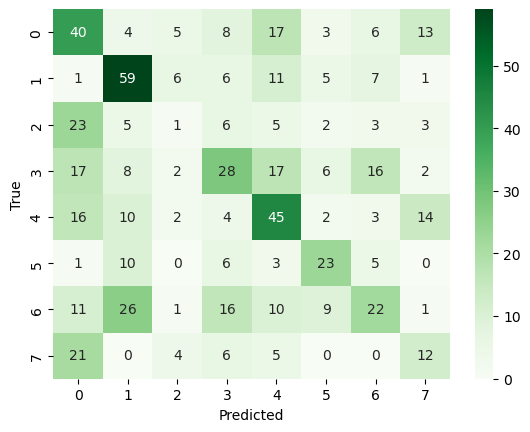

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_true=y_test,y_pred=y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

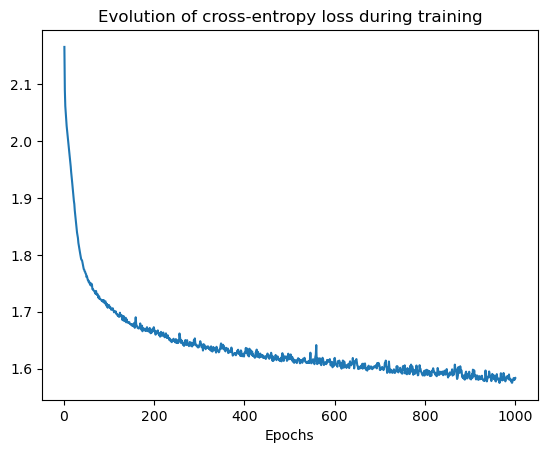

In [119]:
plt.figure()
plt.plot(np.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()

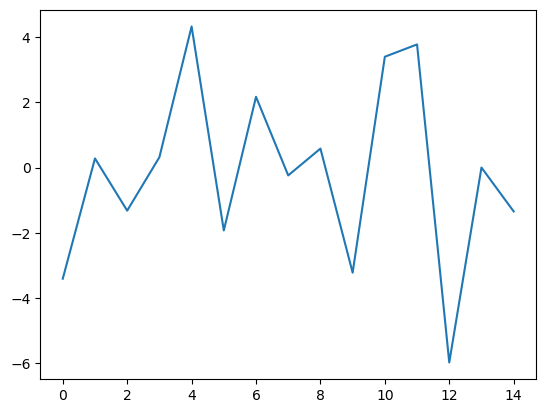

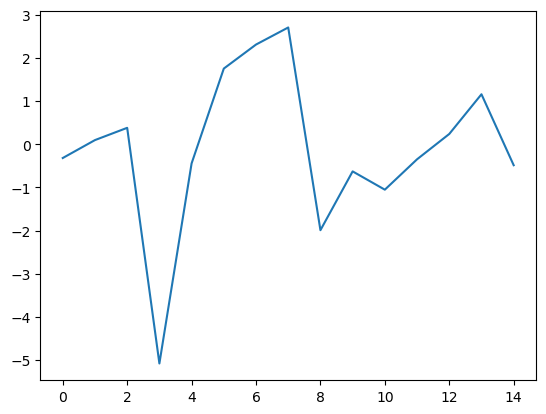

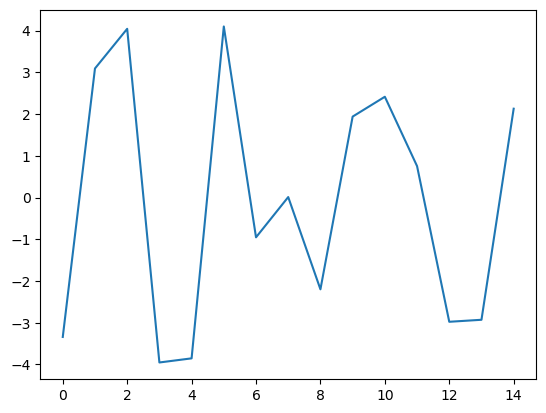

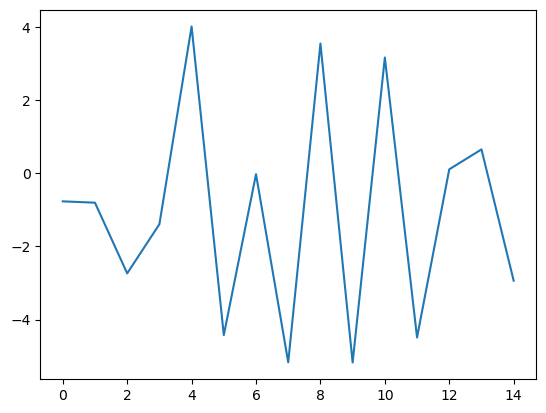

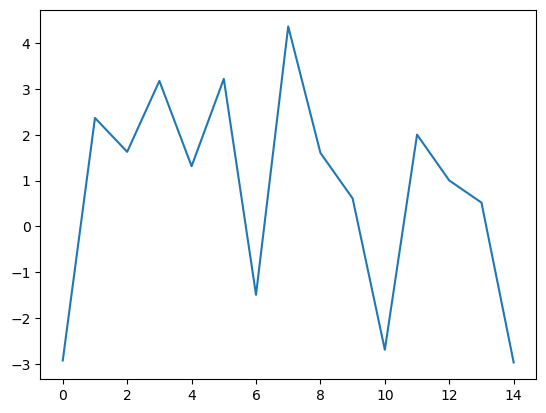

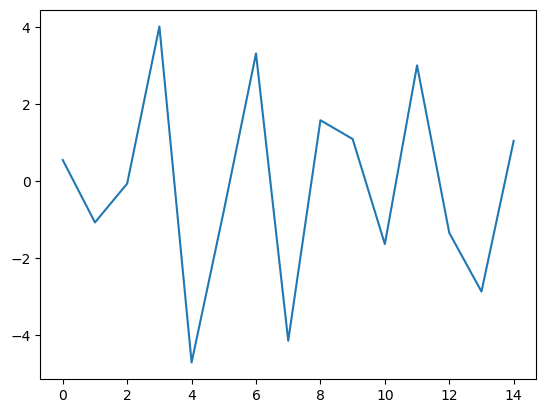

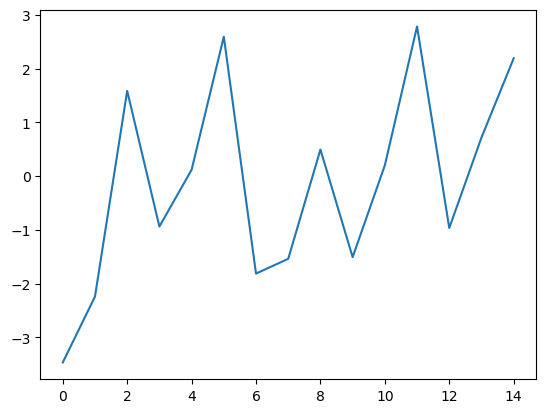

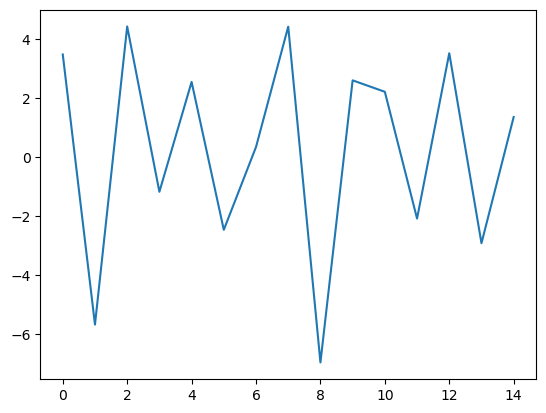

In [120]:

for i in range(8):
    plt.plot(shp_clf.shapelets_[i])
    plt.show()


8/8 [==============================] - 0s 41ms/step


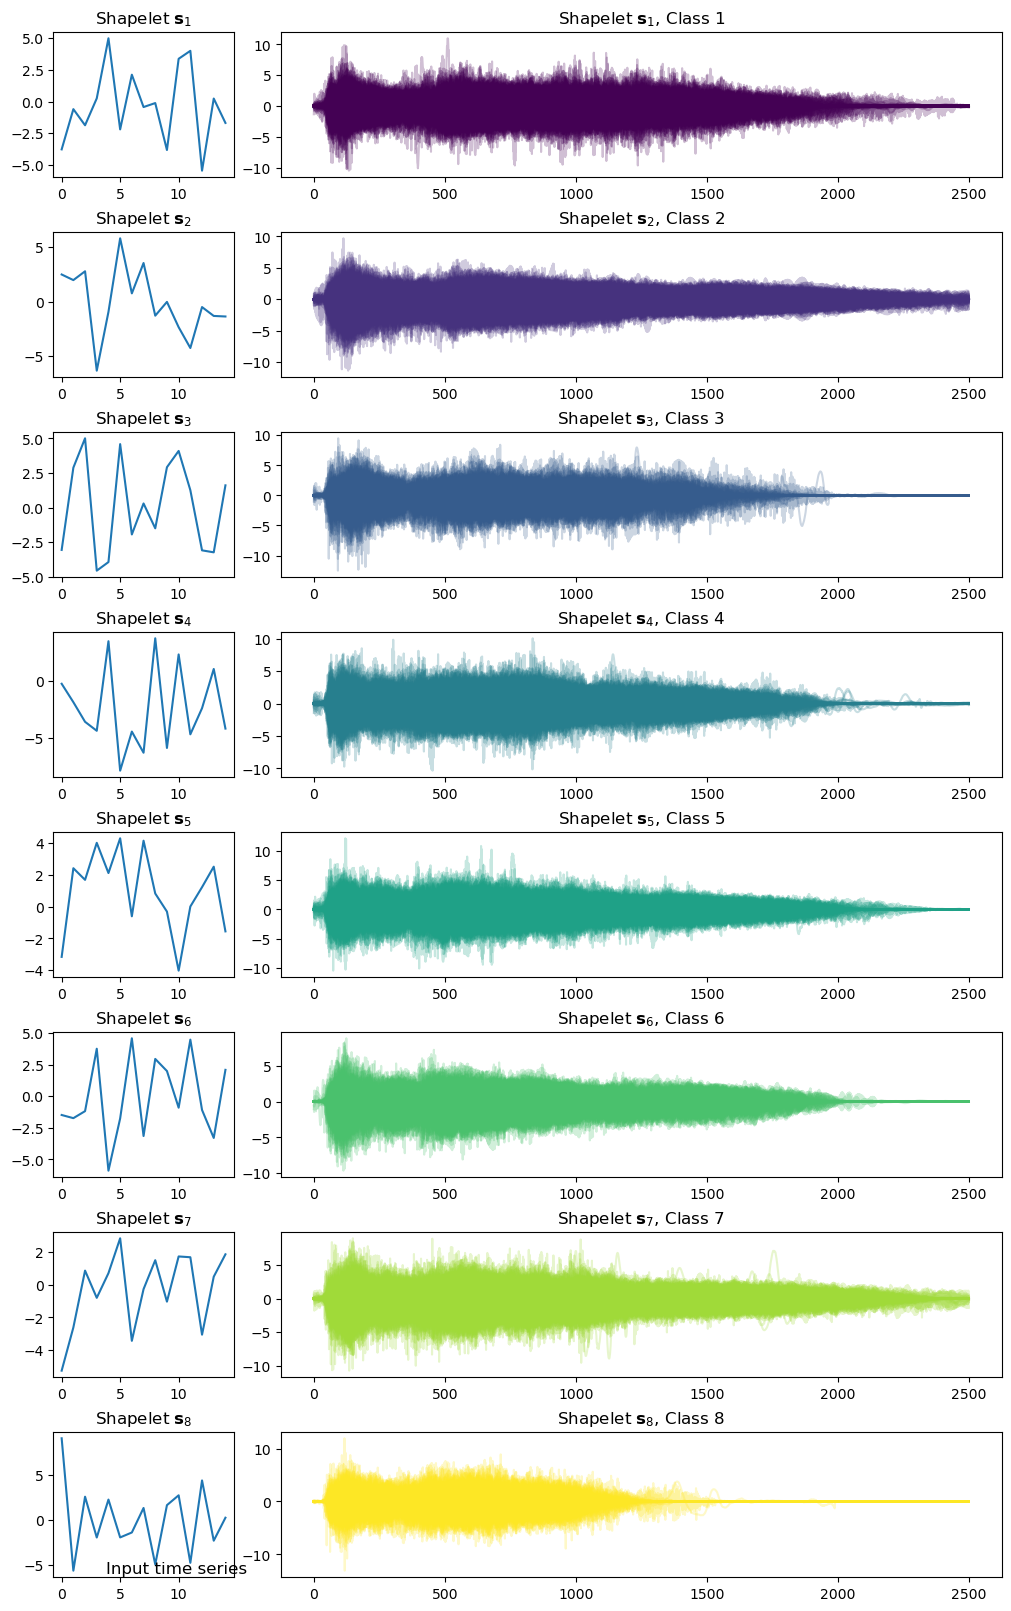

In [29]:
distances = shp_clf.transform(X_train).reshape((-1, 8))
weights, biases = shp_clf.get_weights('classification')

# Create a grid for our shapelets on the left and distances on the right
viridis = plt.cm.get_cmap('viridis', 8)
fig = plt.figure(constrained_layout=True, figsize=(10, 16))  # Adjust the figure size here
gs = fig.add_gridspec(8, 10)  # Adjust the number of rows here
shapelet_axes = [fig.add_subplot(gs[i, :2]) for i in range(8)]
ts_axes = [fig.add_subplot(gs[i, 2:10]) for i in range(8)]

# Plot the shapelets on the left side
for i, shapelet_ax in enumerate(shapelet_axes):
    shapelet_ax.plot(shp_clf.shapelets_[i])
    shapelet_ax.set_title(f'Shapelet $\mathbf{{s}}_{i+1}$')

# Create the time series of each class
for i, ts_ax in enumerate(ts_axes):
    class_label = i
    for k, ts in enumerate(X_train[y_train == class_label]):
        ts_ax.plot(ts.flatten(), c=viridis(i), alpha=0.25)
    ts_ax.set_title(f'Shapelet $\mathbf{{s}}_{i+1}$, Class {class_label+1}')

fig.text(x=0.1, y=0.02, s='Input time series', fontsize=12)

plt.show()

In [32]:
import pickle

In [33]:
save_path = 'shp_clf.pkl'

In [34]:
with open(save_path, 'wb') as file:
    pickle.dump(shp_clf, file)

TypeError: cannot pickle 'weakref' object

In [35]:
X_train2 = shp_clf.transform(X_train)

8/8 [==============================] - 0s 41ms/step


In [36]:
X_test2 = shp_clf.transform(X_test)

3/3 [==============================] - 0s 36ms/step


In [50]:
shp_clf.shapelets_

array([array([[-3.78716564],
              [-0.60429478],
              [-1.87907124],
              [ 0.24720958],
              [ 4.99914122],
              [-2.20442986],
              [ 2.11899734],
              [-0.43913671],
              [-0.12393559],
              [-3.83744097],
              [ 3.37707257],
              [ 4.00712395],
              [-5.46926737],
              [ 0.23356658],
              [-1.69605732]]), array([[ 2.47939587],
                                      [ 1.96565068],
                                      [ 2.77320838],
                                      [-6.3294034 ],
                                      [-0.94592196],
                                      [ 5.79525852],
                                      [ 0.750476  ],
                                      [ 3.53022408],
                                      [-1.29266167],
                                      [-0.03107079],
                                      [-2.3482945 ],
           

In [54]:
shapelets_array = np.array(shapelets_array.tolist(), dtype=np.float64)

In [57]:
shapelets_2d = shapelets_array.reshape((shapelets_array.shape[0], -1))

In [60]:
file_path = 'shapelets.csv'

np.savetxt(file_path, shapelets_2d, delimiter=',')

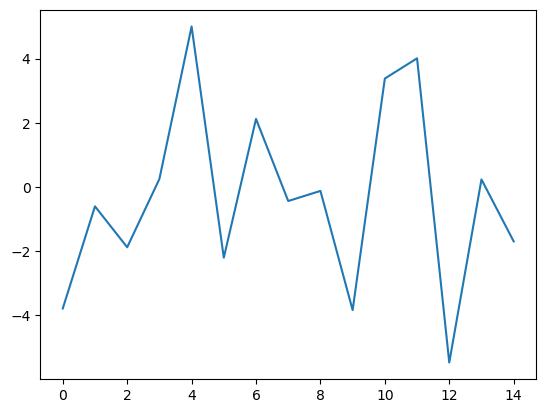

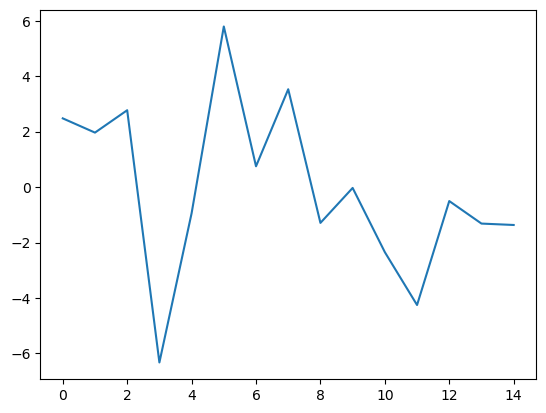

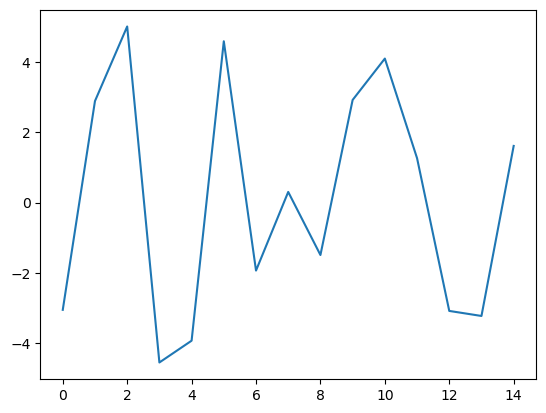

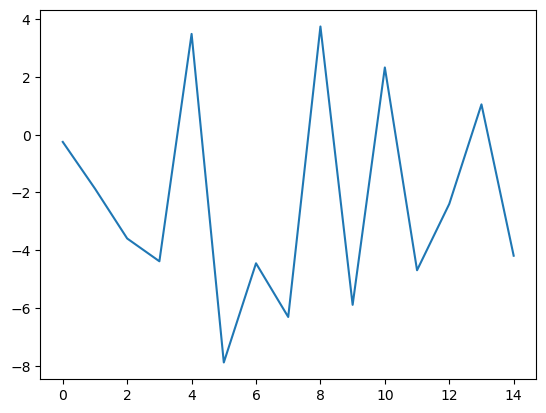

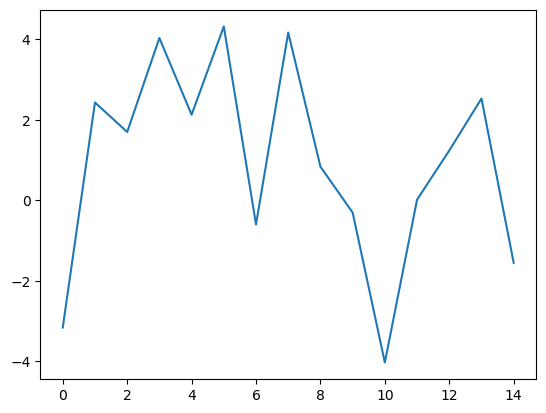

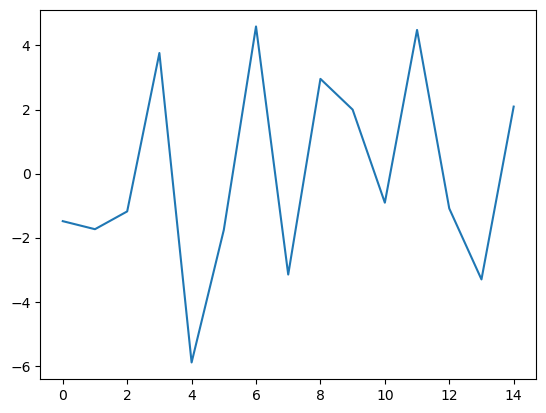

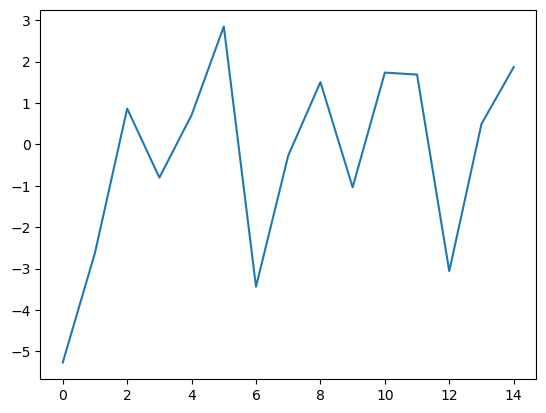

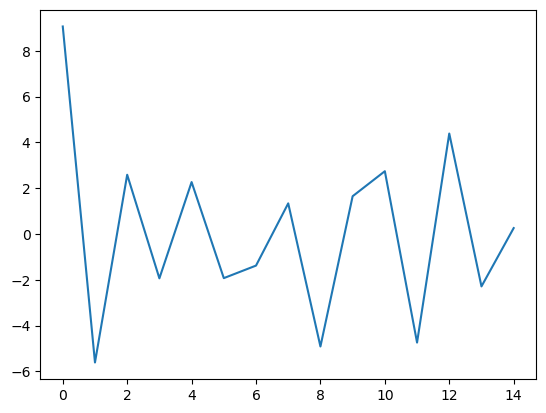

In [58]:

for i in range(8):
    plt.plot(shapelets_2d[i])
    plt.show()


In [59]:
shapelets_2d

array([[-3.78716564, -0.60429478, -1.87907124,  0.24720958,  4.99914122,
        -2.20442986,  2.11899734, -0.43913671, -0.12393559, -3.83744097,
         3.37707257,  4.00712395, -5.46926737,  0.23356658, -1.69605732],
       [ 2.47939587,  1.96565068,  2.77320838, -6.3294034 , -0.94592196,
         5.79525852,  0.750476  ,  3.53022408, -1.29266167, -0.03107079,
        -2.3482945 , -4.2554636 , -0.50478846, -1.31728125, -1.36778772],
       [-3.05719757,  2.88963318,  5.01405096, -4.55657768, -3.93594694,
         4.5927372 , -1.93867147,  0.30135942, -1.49562359,  2.92175221,
         4.09984589,  1.26276565, -3.0881753 , -3.23175049,  1.61177516],
       [-0.24957711, -1.86689937, -3.59261298, -4.38149452,  3.48913789,
        -7.88441563, -4.45123959, -6.30926132,  3.74652076, -5.88920355,
         2.327384  , -4.69191599, -2.39613962,  1.04989374, -4.18909121],
       [-3.16119385,  2.4285624 ,  1.6961323 ,  4.02963972,  2.12470818,
         4.31633186, -0.60113776,  4.16563416, 

### 16 da 15

In [17]:
shapelet_sizes = {15: 16}

In [18]:
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=256,
                            weight_regularizer=.003,
                            max_iter=1000,
                            random_state=42,
                            verbose=1)

C:\Users\franc\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [19]:
shp_clf.fit(X_train, y_train)

Epoch 1/1000
8/8 [==============================] - 1s 94ms/step - loss: 2.2489 - categorical_accuracy: 0.1772 - categorical_crossentropy: 2.2175
Epoch 2/1000
8/8 [==============================] - 1s 94ms/step - loss: 2.0887 - categorical_accuracy: 0.1920 - categorical_crossentropy: 2.0607
Epoch 3/1000
8/8 [==============================] - 1s 96ms/step - loss: 2.0573 - categorical_accuracy: 0.1619 - categorical_crossentropy: 2.0308
Epoch 4/1000
8/8 [==============================] - 1s 93ms/step - loss: 2.0306 - categorical_accuracy: 0.1767 - categorical_crossentropy: 2.0054
Epoch 5/1000
8/8 [==============================] - 1s 96ms/step - loss: 2.0041 - categorical_accuracy: 0.2057 - categorical_crossentropy: 1.9799
Epoch 6/1000
8/8 [==============================] - 1s 93ms/step - loss: 1.9855 - categorical_accuracy: 0.2166 - categorical_crossentropy: 1.9620
Epoch 7/1000
8/8 [==============================] - 1s 93ms/step - loss: 1.9688 - categorical_accuracy: 0.2128 - categorical

8/8 [==============================] - 1s 95ms/step - loss: 1.6000 - categorical_accuracy: 0.4081 - categorical_crossentropy: 1.5422
Epoch 112/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.6027 - categorical_accuracy: 0.4179 - categorical_crossentropy: 1.5452
Epoch 113/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.6053 - categorical_accuracy: 0.4108 - categorical_crossentropy: 1.5475
Epoch 114/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.6028 - categorical_accuracy: 0.4174 - categorical_crossentropy: 1.5450
Epoch 115/1000
8/8 [==============================] - 1s 94ms/step - loss: 1.6028 - categorical_accuracy: 0.4168 - categorical_crossentropy: 1.5450
Epoch 116/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.5984 - categorical_accuracy: 0.4168 - categorical_crossentropy: 1.5403
Epoch 117/1000
8/8 [==============================] - 1s 94ms/step - loss: 1.5990 - categorical_accuracy: 0.4147 - categorical_

8/8 [==============================] - 1s 98ms/step - loss: 1.5643 - categorical_accuracy: 0.4376 - categorical_crossentropy: 1.5015
Epoch 222/1000
8/8 [==============================] - 1s 94ms/step - loss: 1.5685 - categorical_accuracy: 0.4256 - categorical_crossentropy: 1.5057
Epoch 223/1000
8/8 [==============================] - 1s 96ms/step - loss: 1.5669 - categorical_accuracy: 0.4218 - categorical_crossentropy: 1.5041
Epoch 224/1000
8/8 [==============================] - 1s 93ms/step - loss: 1.5507 - categorical_accuracy: 0.4398 - categorical_crossentropy: 1.4879
Epoch 225/1000
8/8 [==============================] - 1s 96ms/step - loss: 1.5479 - categorical_accuracy: 0.4398 - categorical_crossentropy: 1.4852
Epoch 226/1000
8/8 [==============================] - 1s 96ms/step - loss: 1.5626 - categorical_accuracy: 0.4212 - categorical_crossentropy: 1.4998
Epoch 227/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.5570 - categorical_accuracy: 0.4387 - categorical_

8/8 [==============================] - 1s 94ms/step - loss: 1.5365 - categorical_accuracy: 0.4415 - categorical_crossentropy: 1.4714
Epoch 332/1000
8/8 [==============================] - 1s 94ms/step - loss: 1.5345 - categorical_accuracy: 0.4382 - categorical_crossentropy: 1.4693
Epoch 333/1000
8/8 [==============================] - 1s 98ms/step - loss: 1.5237 - categorical_accuracy: 0.4551 - categorical_crossentropy: 1.4586
Epoch 334/1000
8/8 [==============================] - 1s 97ms/step - loss: 1.5318 - categorical_accuracy: 0.4513 - categorical_crossentropy: 1.4668
Epoch 335/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.5353 - categorical_accuracy: 0.4426 - categorical_crossentropy: 1.4703
Epoch 336/1000
8/8 [==============================] - 1s 94ms/step - loss: 1.5387 - categorical_accuracy: 0.4464 - categorical_crossentropy: 1.4738
Epoch 337/1000
8/8 [==============================] - 1s 91ms/step - loss: 1.5375 - categorical_accuracy: 0.4426 - categorical_

8/8 [==============================] - 1s 90ms/step - loss: 1.5137 - categorical_accuracy: 0.4557 - categorical_crossentropy: 1.4473
Epoch 442/1000
8/8 [==============================] - 1s 90ms/step - loss: 1.5064 - categorical_accuracy: 0.4612 - categorical_crossentropy: 1.4400
Epoch 443/1000
8/8 [==============================] - 1s 92ms/step - loss: 1.5147 - categorical_accuracy: 0.4617 - categorical_crossentropy: 1.4485
Epoch 444/1000
8/8 [==============================] - 1s 91ms/step - loss: 1.5109 - categorical_accuracy: 0.4710 - categorical_crossentropy: 1.4446
Epoch 445/1000
8/8 [==============================] - 1s 93ms/step - loss: 1.5126 - categorical_accuracy: 0.4497 - categorical_crossentropy: 1.4461
Epoch 446/1000
8/8 [==============================] - 1s 91ms/step - loss: 1.5144 - categorical_accuracy: 0.4568 - categorical_crossentropy: 1.4480
Epoch 447/1000
8/8 [==============================] - 1s 92ms/step - loss: 1.5136 - categorical_accuracy: 0.4519 - categorical_

8/8 [==============================] - 1s 91ms/step - loss: 1.5036 - categorical_accuracy: 0.4584 - categorical_crossentropy: 1.4355
Epoch 552/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.5001 - categorical_accuracy: 0.4623 - categorical_crossentropy: 1.4322
Epoch 553/1000
8/8 [==============================] - 1s 99ms/step - loss: 1.4911 - categorical_accuracy: 0.4579 - categorical_crossentropy: 1.4232
Epoch 554/1000
8/8 [==============================] - 1s 100ms/step - loss: 1.4973 - categorical_accuracy: 0.4644 - categorical_crossentropy: 1.4293
Epoch 555/1000
8/8 [==============================] - 1s 98ms/step - loss: 1.4980 - categorical_accuracy: 0.4601 - categorical_crossentropy: 1.4300
Epoch 556/1000
8/8 [==============================] - 1s 94ms/step - loss: 1.5010 - categorical_accuracy: 0.4579 - categorical_crossentropy: 1.4329
Epoch 557/1000
8/8 [==============================] - 1s 96ms/step - loss: 1.5097 - categorical_accuracy: 0.4540 - categorical

8/8 [==============================] - 1s 98ms/step - loss: 1.5053 - categorical_accuracy: 0.4601 - categorical_crossentropy: 1.4362
Epoch 662/1000
8/8 [==============================] - 1s 96ms/step - loss: 1.4939 - categorical_accuracy: 0.4546 - categorical_crossentropy: 1.4247
Epoch 663/1000
8/8 [==============================] - 1s 96ms/step - loss: 1.5003 - categorical_accuracy: 0.4524 - categorical_crossentropy: 1.4312
Epoch 664/1000
8/8 [==============================] - 1s 96ms/step - loss: 1.4910 - categorical_accuracy: 0.4557 - categorical_crossentropy: 1.4218
Epoch 665/1000
8/8 [==============================] - 1s 96ms/step - loss: 1.4962 - categorical_accuracy: 0.4513 - categorical_crossentropy: 1.4269
Epoch 666/1000
8/8 [==============================] - 1s 90ms/step - loss: 1.4891 - categorical_accuracy: 0.4617 - categorical_crossentropy: 1.4197
Epoch 667/1000
8/8 [==============================] - 1s 92ms/step - loss: 1.4897 - categorical_accuracy: 0.4579 - categorical_

8/8 [==============================] - 1s 97ms/step - loss: 1.4899 - categorical_accuracy: 0.4606 - categorical_crossentropy: 1.4201
Epoch 772/1000
8/8 [==============================] - 1s 103ms/step - loss: 1.4931 - categorical_accuracy: 0.4557 - categorical_crossentropy: 1.4230
Epoch 773/1000
8/8 [==============================] - 1s 97ms/step - loss: 1.4865 - categorical_accuracy: 0.4699 - categorical_crossentropy: 1.4167
Epoch 774/1000
8/8 [==============================] - 1s 98ms/step - loss: 1.4761 - categorical_accuracy: 0.4694 - categorical_crossentropy: 1.4062
Epoch 775/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.4772 - categorical_accuracy: 0.4743 - categorical_crossentropy: 1.4074
Epoch 776/1000
8/8 [==============================] - 1s 92ms/step - loss: 1.4772 - categorical_accuracy: 0.4776 - categorical_crossentropy: 1.4071
Epoch 777/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.4742 - categorical_accuracy: 0.4754 - categorical

8/8 [==============================] - 1s 92ms/step - loss: 1.4677 - categorical_accuracy: 0.4737 - categorical_crossentropy: 1.3980
Epoch 882/1000
8/8 [==============================] - 1s 93ms/step - loss: 1.4764 - categorical_accuracy: 0.4661 - categorical_crossentropy: 1.4070
Epoch 883/1000
8/8 [==============================] - 1s 89ms/step - loss: 1.4831 - categorical_accuracy: 0.4644 - categorical_crossentropy: 1.4134
Epoch 884/1000
8/8 [==============================] - 1s 89ms/step - loss: 1.4736 - categorical_accuracy: 0.4787 - categorical_crossentropy: 1.4042
Epoch 885/1000
8/8 [==============================] - 1s 92ms/step - loss: 1.4646 - categorical_accuracy: 0.4809 - categorical_crossentropy: 1.3952
Epoch 886/1000
8/8 [==============================] - 1s 92ms/step - loss: 1.4755 - categorical_accuracy: 0.4726 - categorical_crossentropy: 1.4059
Epoch 887/1000
8/8 [==============================] - 1s 90ms/step - loss: 1.4744 - categorical_accuracy: 0.4809 - categorical_

8/8 [==============================] - 1s 95ms/step - loss: 1.4794 - categorical_accuracy: 0.4743 - categorical_crossentropy: 1.4097
Epoch 992/1000
8/8 [==============================] - 1s 89ms/step - loss: 1.4641 - categorical_accuracy: 0.4792 - categorical_crossentropy: 1.3944
Epoch 993/1000
8/8 [==============================] - 1s 95ms/step - loss: 1.4641 - categorical_accuracy: 0.4732 - categorical_crossentropy: 1.3944
Epoch 994/1000
8/8 [==============================] - 1s 88ms/step - loss: 1.4752 - categorical_accuracy: 0.4677 - categorical_crossentropy: 1.4055
Epoch 995/1000
8/8 [==============================] - 1s 91ms/step - loss: 1.4733 - categorical_accuracy: 0.4803 - categorical_crossentropy: 1.4036
Epoch 996/1000
8/8 [==============================] - 1s 88ms/step - loss: 1.4709 - categorical_accuracy: 0.4688 - categorical_crossentropy: 1.4013
Epoch 997/1000
8/8 [==============================] - 1s 93ms/step - loss: 1.4649 - categorical_accuracy: 0.4825 - categorical_

LearningShapelets(max_iter=1000, n_shapelets_per_size={15: 16},
                  optimizer=<keras.optimizers.adam.Adam object at 0x000002523E32B520>,
                  random_state=42, verbose=1, weight_regularizer=0.003)

In [21]:
y_pred = shp_clf.predict(X_test)

3/3 [==============================] - 0s 45ms/step


In [22]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3525641025641026
F1-score [0.30769231 0.5122807  0.08823529 0.25899281 0.26436782 0.37647059
 0.33142857 0.44094488]
              precision    recall  f1-score   support

           0       0.30      0.31      0.31        96
           1       0.39      0.76      0.51        96
           2       0.15      0.06      0.09        48
           3       0.42      0.19      0.26        96
           4       0.29      0.24      0.26        96
           5       0.43      0.33      0.38        48
           6       0.37      0.30      0.33        96
           7       0.35      0.58      0.44        48

    accuracy                           0.35       624
   macro avg       0.34      0.35      0.32       624
weighted avg       0.34      0.35      0.33       624



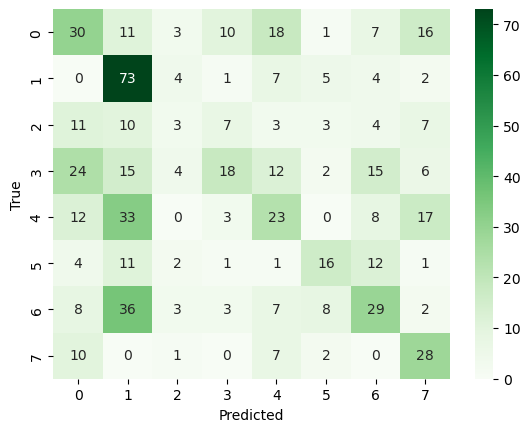

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_true=y_test,y_pred=y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

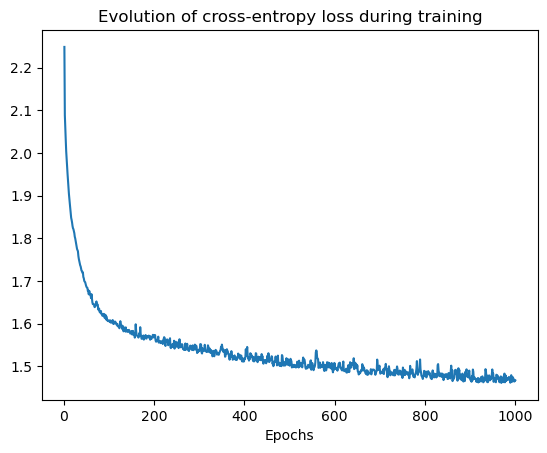

In [24]:
plt.figure()
plt.plot(np.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()

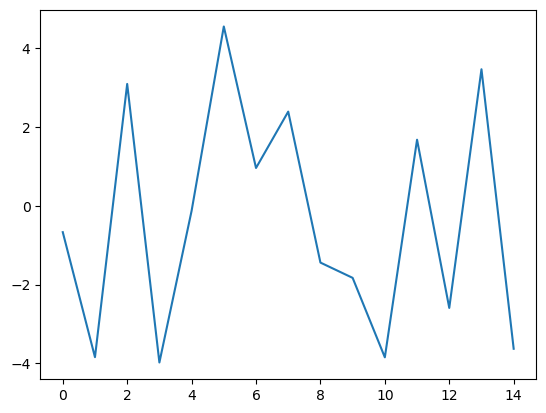

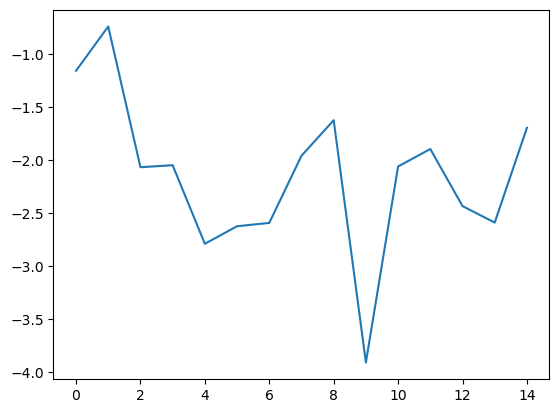

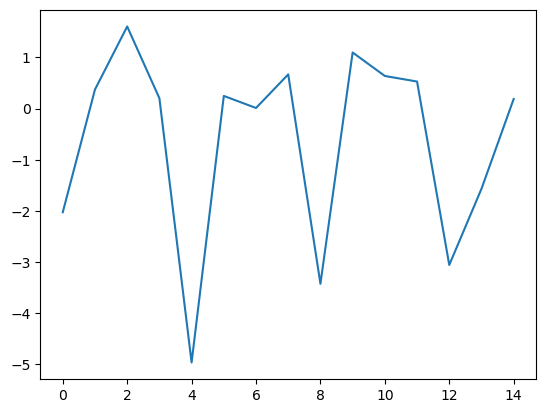

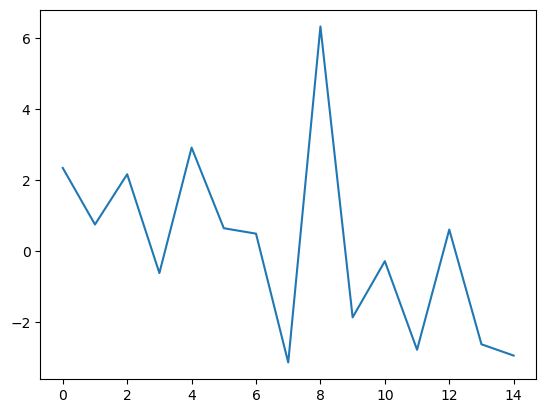

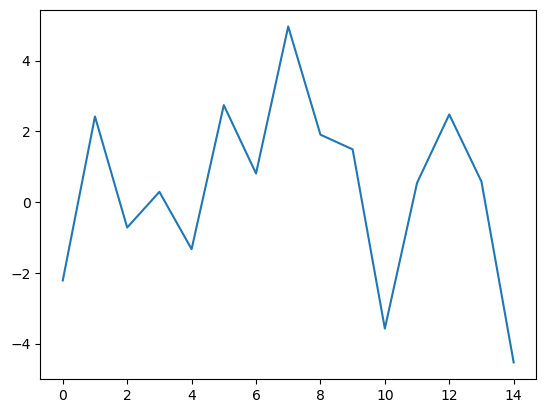

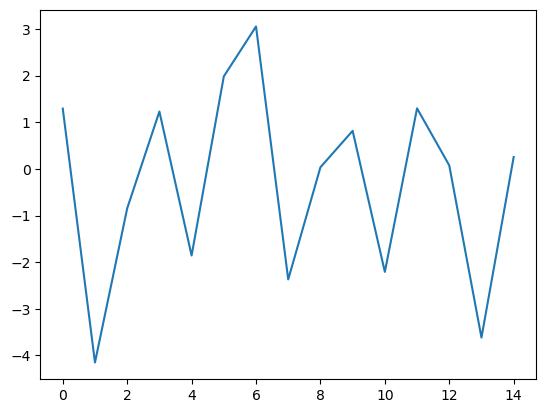

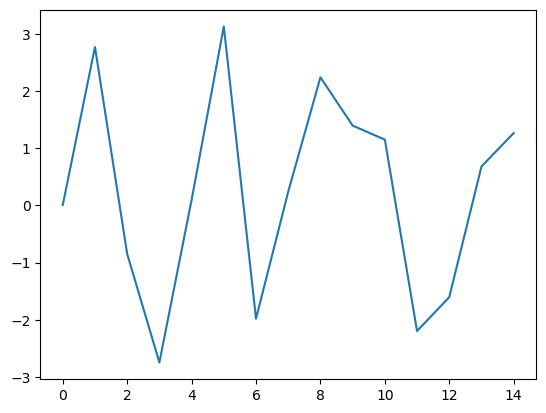

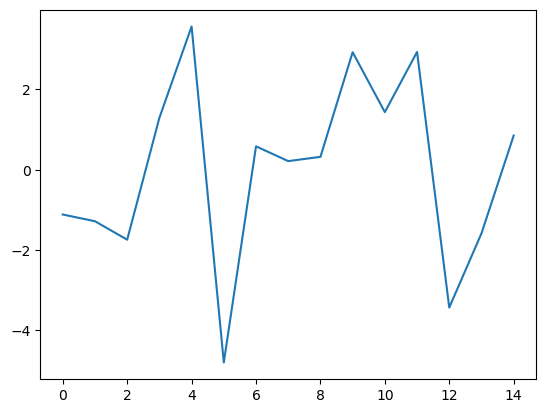

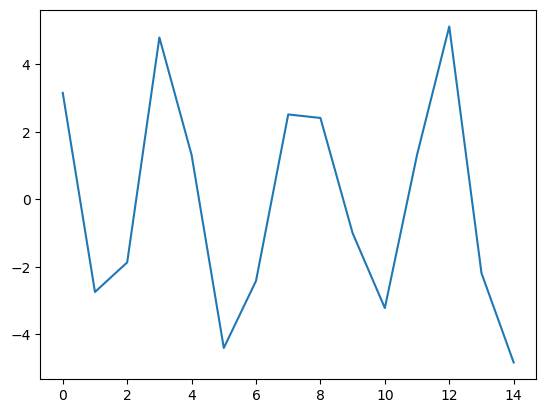

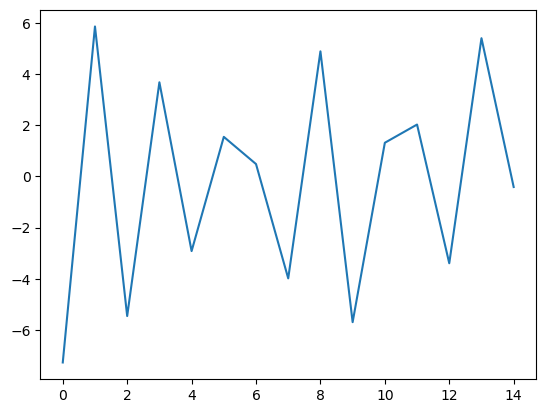

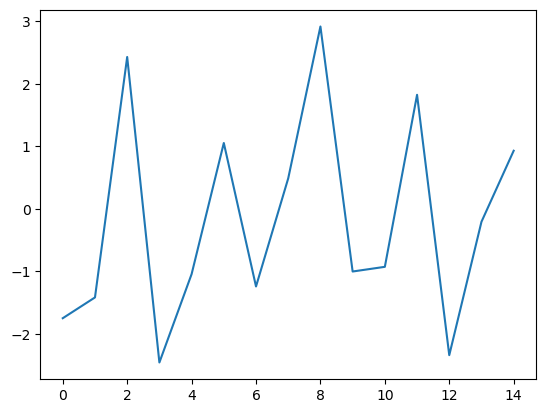

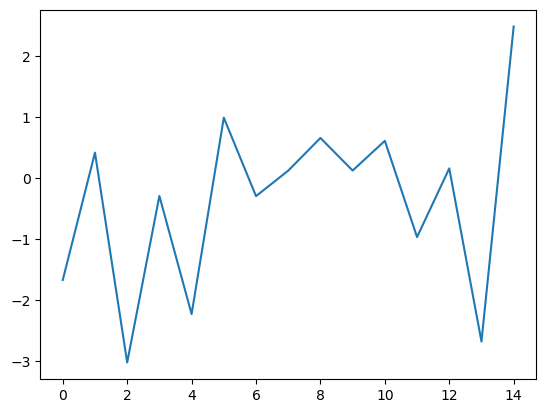

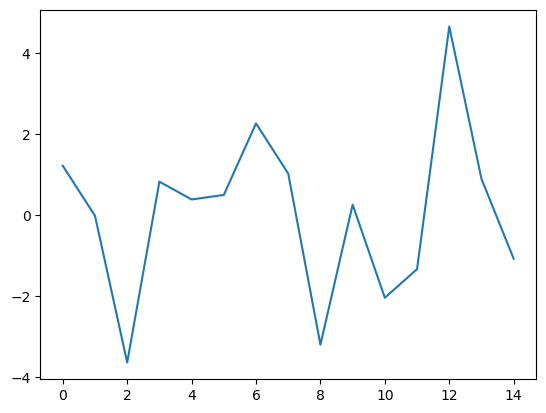

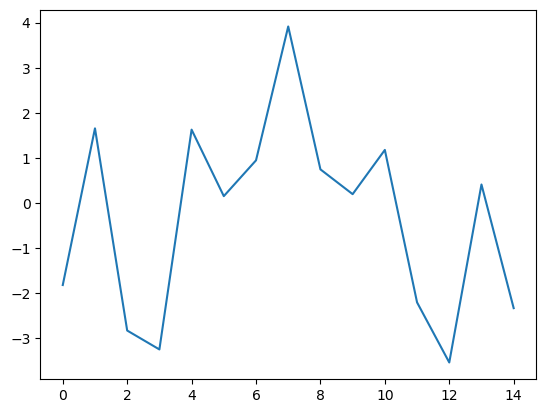

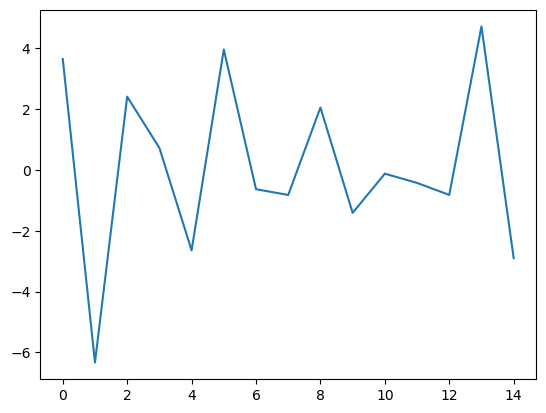

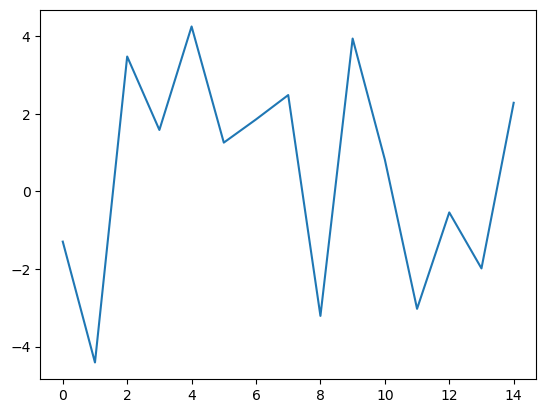

In [27]:

for i in range(16):
    plt.plot(shp_clf.shapelets_[i])
    plt.show()


8/8 [==============================] - 0s 58ms/step


IndexError: index 8 is out of bounds for axis 0 with size 8

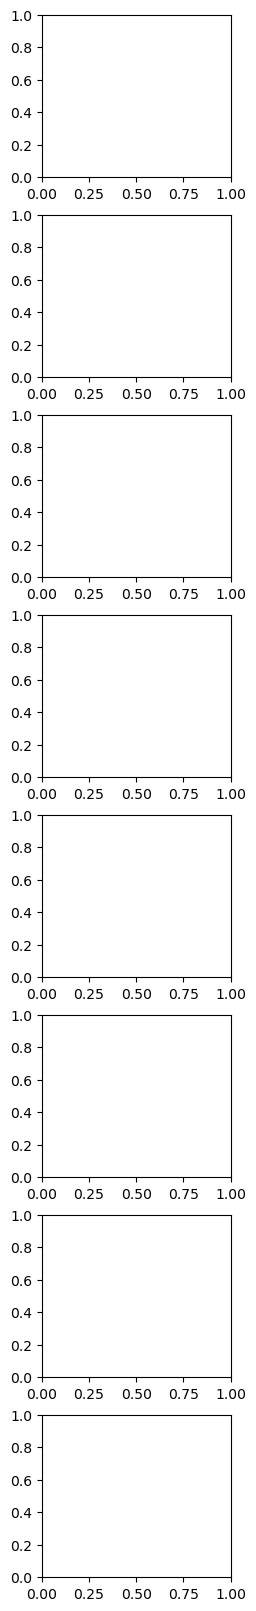

In [30]:
distances = shp_clf.transform(X_train).reshape((-1, 16))
weights, biases = shp_clf.get_weights('classification')

# Create a grid for our shapelets on the left and distances on the right
viridis = plt.cm.get_cmap('viridis', 16)
fig = plt.figure(constrained_layout=True, figsize=(10, 16))  # Adjust the figure size here
gs = fig.add_gridspec(8, 10)  # Adjust the number of rows here
shapelet_axes = [fig.add_subplot(gs[i, :2]) for i in range(16)]
ts_axes = [fig.add_subplot(gs[i, 2:10]) for i in range(8)]

# Plot the shapelets on the left side
for i, shapelet_ax in enumerate(shapelet_axes):
    shapelet_ax.plot(shp_clf.shapelets_[i])
    shapelet_ax.set_title(f'Shapelet $\mathbf{{s}}_{i+1}$')

# Create the time series of each class
for i, ts_ax in enumerate(ts_axes):
    class_label = i
    for k, ts in enumerate(X_train[y_train == class_label]):
        ts_ax.plot(ts.flatten(), c=viridis(i), alpha=0.25)
    ts_ax.set_title(f'Shapelet $\mathbf{{s}}_{i+1}$, Class {class_label+1}')

fig.text(x=0.1, y=0.02, s='Input time series', fontsize=12)

plt.show()

### 12 da 15

In [31]:
shapelet_sizes = {15: 12}

In [32]:
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=256,
                            weight_regularizer=.003,
                            max_iter=1000,
                            random_state=42,
                            verbose=1)

C:\Users\franc\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [33]:
shp_clf.fit(X_train, y_train)

Epoch 1/1000
8/8 [==============================] - 1s 76ms/step - loss: 2.1900 - categorical_accuracy: 0.1679 - categorical_crossentropy: 2.1618
Epoch 2/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.0874 - categorical_accuracy: 0.1931 - categorical_crossentropy: 2.0626
Epoch 3/1000
8/8 [==============================] - 1s 74ms/step - loss: 2.0489 - categorical_accuracy: 0.1926 - categorical_crossentropy: 2.0258
Epoch 4/1000
8/8 [==============================] - 1s 75ms/step - loss: 2.0315 - categorical_accuracy: 0.1942 - categorical_crossentropy: 2.0096
Epoch 5/1000
8/8 [==============================] - 1s 78ms/step - loss: 2.0100 - categorical_accuracy: 0.2030 - categorical_crossentropy: 1.9891
Epoch 6/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.9931 - categorical_accuracy: 0.2205 - categorical_crossentropy: 1.9729
Epoch 7/1000
8/8 [==============================] - 1s 73ms/step - loss: 1.9796 - categorical_accuracy: 0.2281 - categorical

8/8 [==============================] - 1s 75ms/step - loss: 1.6396 - categorical_accuracy: 0.3939 - categorical_crossentropy: 1.5932
Epoch 112/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.6392 - categorical_accuracy: 0.3928 - categorical_crossentropy: 1.5931
Epoch 113/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.6408 - categorical_accuracy: 0.3972 - categorical_crossentropy: 1.5945
Epoch 114/1000
8/8 [==============================] - 1s 80ms/step - loss: 1.6376 - categorical_accuracy: 0.3972 - categorical_crossentropy: 1.5910
Epoch 115/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.6404 - categorical_accuracy: 0.3944 - categorical_crossentropy: 1.5939
Epoch 116/1000
8/8 [==============================] - 1s 72ms/step - loss: 1.6347 - categorical_accuracy: 0.3933 - categorical_crossentropy: 1.5878
Epoch 117/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.6376 - categorical_accuracy: 0.3972 - categorical_

8/8 [==============================] - 1s 75ms/step - loss: 1.6018 - categorical_accuracy: 0.4256 - categorical_crossentropy: 1.5497
Epoch 222/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.6039 - categorical_accuracy: 0.4114 - categorical_crossentropy: 1.5517
Epoch 223/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.6045 - categorical_accuracy: 0.4130 - categorical_crossentropy: 1.5523
Epoch 224/1000
8/8 [==============================] - 1s 72ms/step - loss: 1.5986 - categorical_accuracy: 0.4158 - categorical_crossentropy: 1.5464
Epoch 225/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.5995 - categorical_accuracy: 0.4163 - categorical_crossentropy: 1.5473
Epoch 226/1000
8/8 [==============================] - 1s 72ms/step - loss: 1.6066 - categorical_accuracy: 0.3944 - categorical_crossentropy: 1.5542
Epoch 227/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.6004 - categorical_accuracy: 0.4245 - categorical_

8/8 [==============================] - 1s 72ms/step - loss: 1.5610 - categorical_accuracy: 0.4223 - categorical_crossentropy: 1.5035
Epoch 332/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.5570 - categorical_accuracy: 0.4316 - categorical_crossentropy: 1.4994
Epoch 333/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.5459 - categorical_accuracy: 0.4393 - categorical_crossentropy: 1.4883
Epoch 334/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.5539 - categorical_accuracy: 0.4393 - categorical_crossentropy: 1.4965
Epoch 335/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.5580 - categorical_accuracy: 0.4393 - categorical_crossentropy: 1.5007
Epoch 336/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.5576 - categorical_accuracy: 0.4464 - categorical_crossentropy: 1.5003
Epoch 337/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.5543 - categorical_accuracy: 0.4393 - categorical_

8/8 [==============================] - 1s 77ms/step - loss: 1.5388 - categorical_accuracy: 0.4453 - categorical_crossentropy: 1.4822
Epoch 442/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.5352 - categorical_accuracy: 0.4453 - categorical_crossentropy: 1.4784
Epoch 443/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.5411 - categorical_accuracy: 0.4447 - categorical_crossentropy: 1.4845
Epoch 444/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.5376 - categorical_accuracy: 0.4447 - categorical_crossentropy: 1.4809
Epoch 445/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.5394 - categorical_accuracy: 0.4349 - categorical_crossentropy: 1.4828
Epoch 446/1000
8/8 [==============================] - 1s 79ms/step - loss: 1.5417 - categorical_accuracy: 0.4530 - categorical_crossentropy: 1.4851
Epoch 447/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.5370 - categorical_accuracy: 0.4426 - categorical_

8/8 [==============================] - 1s 76ms/step - loss: 1.5371 - categorical_accuracy: 0.4398 - categorical_crossentropy: 1.4811
Epoch 552/1000
8/8 [==============================] - 1s 78ms/step - loss: 1.5337 - categorical_accuracy: 0.4464 - categorical_crossentropy: 1.4780
Epoch 553/1000
8/8 [==============================] - 1s 78ms/step - loss: 1.5247 - categorical_accuracy: 0.4431 - categorical_crossentropy: 1.4689
Epoch 554/1000
8/8 [==============================] - 1s 79ms/step - loss: 1.5318 - categorical_accuracy: 0.4508 - categorical_crossentropy: 1.4761
Epoch 555/1000
8/8 [==============================] - 1s 79ms/step - loss: 1.5291 - categorical_accuracy: 0.4568 - categorical_crossentropy: 1.4734
Epoch 556/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.5341 - categorical_accuracy: 0.4349 - categorical_crossentropy: 1.4783
Epoch 557/1000
8/8 [==============================] - 1s 79ms/step - loss: 1.5471 - categorical_accuracy: 0.4404 - categorical_

8/8 [==============================] - 1s 75ms/step - loss: 1.5343 - categorical_accuracy: 0.4623 - categorical_crossentropy: 1.4789
Epoch 662/1000
8/8 [==============================] - 1s 75ms/step - loss: 1.5236 - categorical_accuracy: 0.4458 - categorical_crossentropy: 1.4679
Epoch 663/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.5288 - categorical_accuracy: 0.4426 - categorical_crossentropy: 1.4733
Epoch 664/1000
8/8 [==============================] - 1s 79ms/step - loss: 1.5227 - categorical_accuracy: 0.4628 - categorical_crossentropy: 1.4671
Epoch 665/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.5251 - categorical_accuracy: 0.4354 - categorical_crossentropy: 1.4694
Epoch 666/1000
8/8 [==============================] - 1s 74ms/step - loss: 1.5188 - categorical_accuracy: 0.4584 - categorical_crossentropy: 1.4631
Epoch 667/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.5271 - categorical_accuracy: 0.4519 - categorical_

8/8 [==============================] - 1s 88ms/step - loss: 1.5279 - categorical_accuracy: 0.4524 - categorical_crossentropy: 1.4730
Epoch 772/1000
8/8 [==============================] - 1s 89ms/step - loss: 1.5353 - categorical_accuracy: 0.4431 - categorical_crossentropy: 1.4801
Epoch 773/1000
8/8 [==============================] - 1s 83ms/step - loss: 1.5232 - categorical_accuracy: 0.4535 - categorical_crossentropy: 1.4684
Epoch 774/1000
8/8 [==============================] - 1s 79ms/step - loss: 1.5137 - categorical_accuracy: 0.4524 - categorical_crossentropy: 1.4586
Epoch 775/1000
8/8 [==============================] - 1s 76ms/step - loss: 1.5255 - categorical_accuracy: 0.4562 - categorical_crossentropy: 1.4707
Epoch 776/1000
8/8 [==============================] - 1s 77ms/step - loss: 1.5173 - categorical_accuracy: 0.4590 - categorical_crossentropy: 1.4623
Epoch 777/1000
8/8 [==============================] - 1s 89ms/step - loss: 1.5152 - categorical_accuracy: 0.4497 - categorical_

8/8 [==============================] - 1s 87ms/step - loss: 1.5198 - categorical_accuracy: 0.4393 - categorical_crossentropy: 1.4644
Epoch 882/1000
8/8 [==============================] - 1s 84ms/step - loss: 1.5161 - categorical_accuracy: 0.4590 - categorical_crossentropy: 1.4610
Epoch 883/1000
8/8 [==============================] - 1s 86ms/step - loss: 1.5192 - categorical_accuracy: 0.4404 - categorical_crossentropy: 1.4637
Epoch 884/1000
8/8 [==============================] - 1s 84ms/step - loss: 1.5124 - categorical_accuracy: 0.4655 - categorical_crossentropy: 1.4573
Epoch 885/1000
8/8 [==============================] - 1s 88ms/step - loss: 1.5088 - categorical_accuracy: 0.4453 - categorical_crossentropy: 1.4536
Epoch 886/1000
8/8 [==============================] - 1s 83ms/step - loss: 1.5149 - categorical_accuracy: 0.4595 - categorical_crossentropy: 1.4598
Epoch 887/1000
8/8 [==============================] - 1s 80ms/step - loss: 1.5098 - categorical_accuracy: 0.4617 - categorical_

8/8 [==============================] - 1s 84ms/step - loss: 1.5086 - categorical_accuracy: 0.4519 - categorical_crossentropy: 1.4538
Epoch 992/1000
8/8 [==============================] - 1s 81ms/step - loss: 1.5042 - categorical_accuracy: 0.4666 - categorical_crossentropy: 1.4493
Epoch 993/1000
8/8 [==============================] - 1s 81ms/step - loss: 1.5035 - categorical_accuracy: 0.4551 - categorical_crossentropy: 1.4487
Epoch 994/1000
8/8 [==============================] - 1s 81ms/step - loss: 1.5112 - categorical_accuracy: 0.4458 - categorical_crossentropy: 1.4564
Epoch 995/1000
8/8 [==============================] - 1s 79ms/step - loss: 1.5108 - categorical_accuracy: 0.4590 - categorical_crossentropy: 1.4558
Epoch 996/1000
8/8 [==============================] - 1s 80ms/step - loss: 1.5154 - categorical_accuracy: 0.4480 - categorical_crossentropy: 1.4606
Epoch 997/1000
8/8 [==============================] - 1s 83ms/step - loss: 1.5111 - categorical_accuracy: 0.4595 - categorical_

LearningShapelets(max_iter=1000, n_shapelets_per_size={15: 12},
                  optimizer=<keras.optimizers.adam.Adam object at 0x000002526F3E98B0>,
                  random_state=42, verbose=1, weight_regularizer=0.003)

In [34]:
y_pred = shp_clf.predict(X_test)

3/3 [==============================] - 0s 41ms/step


In [35]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3092948717948718
F1-score [0.25225225 0.48888889 0.06153846 0.25165563 0.25882353 0.42857143
 0.23602484 0.26804124]
              precision    recall  f1-score   support

           0       0.22      0.29      0.25        96
           1       0.38      0.69      0.49        96
           2       0.12      0.04      0.06        48
           3       0.35      0.20      0.25        96
           4       0.30      0.23      0.26        96
           5       0.38      0.50      0.43        48
           6       0.29      0.20      0.24        96
           7       0.27      0.27      0.27        48

    accuracy                           0.31       624
   macro avg       0.29      0.30      0.28       624
weighted avg       0.29      0.31      0.29       624

